# ***`Context:`***

### ***This dataset is related to a medical or health study, with the goal of analyzing the factors associated with strokes. The "stroke" column likely indicates whether an individual has experienced a stroke, and the other columns provide various demographic and health-related information about the individuals in the dataset*** 


# ***`Content :`***


## ***The cerebral Stroke dataset consists of 12 features including the target column which is imbalanced.***

****id: A unique identifier for each individual.****

***gender: The gender of the individual (e.g., Male, Female).***

***age: The age of the individual.***

***hypertension: Whether the individual has hypertension (1 for yes, 0 for no).***

***heart_disease: Whether the individual has heart disease (1 for yes, 0 for no).***

***ever_married: Whether the individual is ever married (Yes or No).***

***work_type: The type of work the individual does (e.g., Private, Never_worked).***

***Residence_type: The type of residence of the individual (e.g., Rural, Urban).***

***avg_glucose_level: The average glucose level of the individual.***

***bmi: The Body Mass Index (BMI) of the individual.***

***smoking_status: The smoking status of the individual (e.g., never smoked, formerly smoked).***

***stroke: Whether the individual has had a stroke (1 for yes, 0 for no).***

# ***`Problem Statement:`***

## "***To build a predictive model to identify individuals at a higher risk of stroke. The primary objective is to identify key predictors of strokes and create a valuable tool for healthcare professionals to assess stroke risk in patients, thereby facilitating early intervention and prevention strategies***."

In [1]:
#IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OrdinalEncoder,PowerTransformer
from sklearn.metrics import confusion_matrix,recall_score,classification_report,roc_curve,roc_auc_score,accuracy_score,cohen_kappa_score,f1_score,precision_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,StackingClassifier
from sklearn.linear_model import SGDClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

In [3]:
#READING THE DATASET
stroke_data=pd.read_csv('dataset.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.000000,0,0,No,children,Rural,95.120000,18.000000,NaN,0
1,30468,Male,58.000000,1,0,Yes,Private,Urban,87.960000,39.200000,never smoked,0
2,16523,Female,8.000000,0,0,No,Private,Urban,110.890000,17.600000,NaN,0
3,56543,Female,70.000000,0,0,Yes,Private,Rural,69.040000,35.900000,formerly smoked,0
4,46136,Male,14.000000,0,0,No,Never_worked,Rural,161.280000,19.100000,NaN,0


# ***`UNDERSTANDING THE DATA:`***

In [4]:
stroke_data.shape
print('Total number of rows :',stroke_data.shape[0])
print('Total number of columns :',stroke_data.shape[1])

Total number of rows : 43400
Total number of columns : 12


In [5]:
print('The Columns in the DATASET ARE :',stroke_data.columns)

The Columns in the DATASET ARE : Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [6]:
print(stroke_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB
None


### ***`INTERPERTATION`***

***- Total Rows:*** 43,400
***- Columns:***

  ***1. `id`: A unique identifier for each individual (integer).***
  
  ***2. `gender`: The gender of the individual (categorical - object).***
  
  ***3. `age`: The age of the individual (numerical - float64).***
  
  ***4. `hypertension`: Whether the individual has hypertension (binary - int64).***
  
  ***5. `heart_disease`: Whether the individual has heart disease (binary - int64).***
  
  ***6. `ever_married`: Whether the individual is ever married (categorical - object).***
  
  ***7. `work_type`: The type of work the individual does (categorical - object).***
  
  ***8. `Residence_type`: The type of residence of the individual (categorical - object).***
  
  ***9. `avg_glucose_level`: The average glucose level of the individual (numerical - float64).***
  
  ***10. `bmi`: The Body Mass Index (BMI) of the individual (numerical - float64).***
  
  ***11. `smoking_status`: The smoking status of the individual (categorical - object).***
  
  ***12. `stroke`: Whether the individual has had a stroke (binary - int64).***

- **Missing Values:**
  ***- The `bmi` column has missing values, with 41,938 non-null entries out of 43,400 total rows.***
  ***- The `smoking_status` column also has missing values, with 30,108 non-null entries out of 43,400 total rows.***

 ***The presence of missing values in the `bmi` and `smoking_status` columns may require handling***

### ***We can verify the type of data and the  null counts from the above analysis***

# ***`Statistical Analysis:`***

In [7]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


#### ***`INTERPRETATION:`***
***`age`: The average age in the dataset is approximately 42.22 years, with a wide age range from 0.08 years to 82 years.***

***`hypertension and heart_disease`: These binary variables indicate the presence (1) or absence (0) of hypertension and heart disease, respectively. The majority of individuals in the dataset do not have these conditions based on the low means.***

***`avg_glucose_level`: The average glucose level in the dataset has a mean of approximately 104.48, with a range from 55.00 to 291.05.***

***`bmi`: There are missing values in the BMI column, as indicated by the difference in counts. Among the available data, the average BMI is approximately 28.61.***

***`stroke`: This binary variable indicates the presence (1) or absence (0) of a stroke. The mean suggests that strokes are relatively rare in this dataset.***

***These statistics provide an initial understanding of the dataset's numerical features, which can be useful for further analysis and modeling.***

# ***`DETECTING THE NULL VALUES:`***

In [8]:
stroke_data.isnull().sum()/len(stroke_data)*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.368664
smoking_status      30.626728
stroke               0.000000
dtype: float64

In [9]:
null_values = (stroke_data.isnull().sum()/len(stroke_data))*100
null_values[null_values>60]

Series([], dtype: float64)

In [10]:
print("Percentage of missing values in BMI :: ",round(stroke_data['bmi'].isna().sum()/len(stroke_data['bmi'])*100,2))
print("Percentage of missing values in Smoking Status :: ",round(stroke_data['smoking_status'].isna().sum()/len(stroke_data['smoking_status'])*100,2))

Percentage of missing values in BMI ::  3.37
Percentage of missing values in Smoking Status ::  30.63


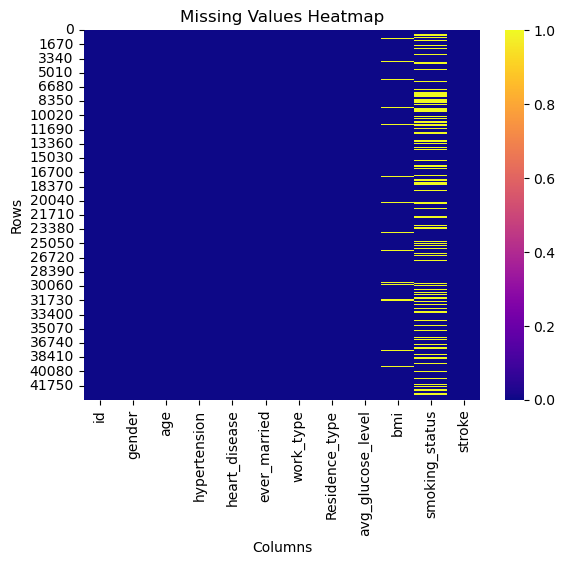

In [11]:
sns.heatmap(stroke_data.isnull(), cmap='plasma') 

plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

#### ***On verifying the total percentage of the null values in the columns we are able to infer that there are 30.63% of null values in Smoking Status and around 3.37% of null values in Average Glucose Level and there are no columns containing more than 60% of NULL VALUES we need to do the appropriate imputing treatment for the null values***

### ***`REDUNTANT COLUMNS:`***

In [12]:
stroke_data[stroke_data.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


### ***I`NTERPERTATION:`***

#### ***On verifying there is no duplicate rows in the data set***

### ***`CHECKING ANOMALIES:`***

In [13]:
cols=list(stroke_data.select_dtypes(exclude=np.number).columns)
for i in cols:
    print(stroke_data[i].value_counts())

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64
Yes    27938
No     15462
Name: ever_married, dtype: int64
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64
Urban    21756
Rural    21644
Name: Residence_type, dtype: int64
never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64


In [14]:
stroke_data['id'].value_counts().unique()

array([1], dtype=int64)

### ***`Dealing with Ambiguity:`***

In [15]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [16]:
stroke_data[['hypertension', 'heart_disease','id','stroke']]=stroke_data[['hypertension', 'heart_disease','id','stroke']].astype('object')

In [17]:
conversion=lambda x: x.replace({0:'no',1:'yes',2:'maybe'})

In [18]:
stroke_data[['hypertension', 'heart_disease','id','stroke']]=stroke_data[['hypertension', 'heart_disease','id','stroke']].apply(conversion,axis=1)

In [19]:
stroke_data['gender']=stroke_data['gender'].replace({"Other":'Male'})

***The reason for converting the binary categorical variables (e.g., hypertension, heart_disease, stroke) to 'object' data type with "Yes" and "No" values is primarily for clarity and interpretability.***

***By representing these variables as "Yes" or "No," it makes the meaning of the values more explicit and easier to understand, especially for individuals who may not be familiar with the underlying coding convention (0 and 1).***

***Additionally, in some data visualization and reporting contexts, using "Yes" or "No" labels can be more informative and reader-friendly than displaying 0s and 1s.***

### ***`NULL VALUE ANALYSIS:`***

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
stroke_data.drop('id',axis=1,inplace=True)

In [22]:
stroke_data['bmi']=stroke_data['bmi'].fillna(stroke_data['bmi'].median())

In [23]:
stroke_data['smoking_status'].fillna(stroke_data['smoking_status'].mode()[0], inplace=True)

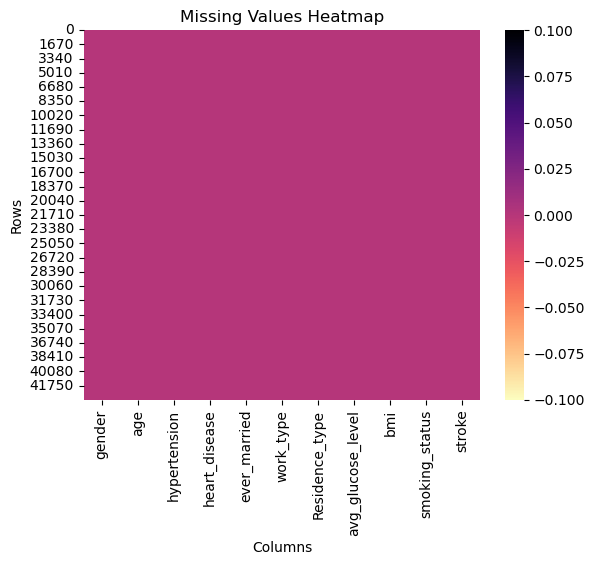

In [24]:
sns.heatmap(stroke_data.isnull(), cmap='magma_r') 

plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

 ***Since there are only very less missing values in the bmi column 3.37% we have filled useing the Knn imputer so that it will be filled based on the neighbours KNN imputation is generally robust to outliers because it uses a neighborhood-based approach. Outliers tend to have less influence on imputations when compared to simple mean or median imputation***
 
***For this situation there are around 33% of the missing value filling it with mode as the datatype is categorical so this method of imputation  would be appropriate as the majority of the class are the non smokers***

In [25]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.000000,no,no,No,children,Rural,95.120000,18.000000,never smoked,no
1,Male,58.000000,yes,no,Yes,Private,Urban,87.960000,39.200000,never smoked,no
2,Female,8.000000,no,no,No,Private,Urban,110.890000,17.600000,never smoked,no
3,Female,70.000000,no,no,Yes,Private,Rural,69.040000,35.900000,formerly smoked,no
4,Male,14.000000,no,no,No,Never_worked,Rural,161.280000,19.100000,never smoked,no


In [26]:
num=stroke_data.select_dtypes(include=np.number)
cat=stroke_data.select_dtypes(exclude=np.number)

In [27]:
stroke_data.describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,43400.000000
mean,42.217894,104.482750,28.574551
std,22.519649,43.111751,7.639769
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.400000
50%,44.000000,91.580000,27.700000
75%,60.000000,112.070000,32.600000
max,82.000000,291.050000,97.600000


### ***`Univariate Analysis:`***

<AxesSubplot:xlabel='age', ylabel='Density'>

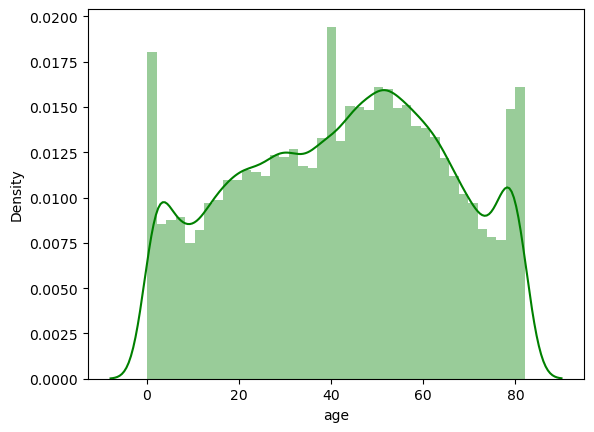

In [28]:
sns.distplot(stroke_data['age'],color='g')

### ***`Inference:`***
#### *1. A higher number of patients are above the age of 75.*
#### *2. More number of patients are of age group 40 to 60*
#### *3. The data consists of just 20 patients with an age less than 1*

<AxesSubplot:xlabel='bmi', ylabel='Density'>

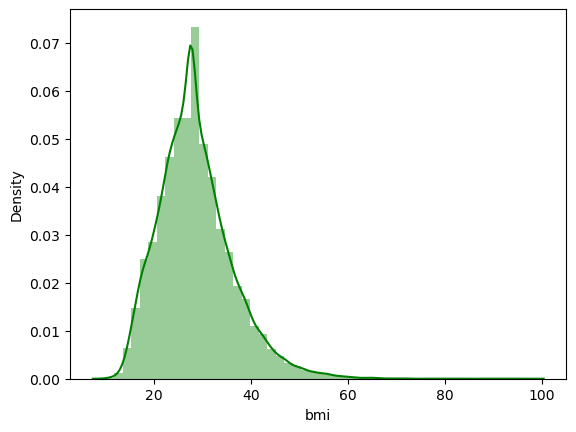

In [29]:
sns.distplot(stroke_data['bmi'],color='g')

In [30]:
print(stroke_data['bmi'].min())
print(stroke_data['bmi'].quantile(0.75))

10.1
32.6


### *`Inference:`*
#### *1. 75% of the patients have an bmi lesser than 32.6*

#### *2. The minimum bmi observed for the patient is 10.1*

#### *3. The bmi is positive and right skewed data*

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

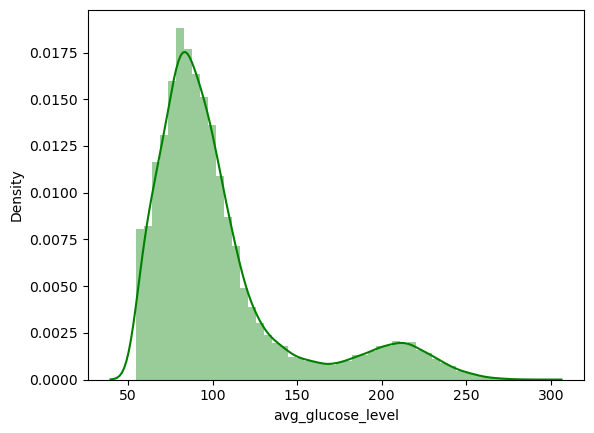

In [31]:
sns.distplot(stroke_data['avg_glucose_level'],color='g')

In [32]:
print(stroke_data['avg_glucose_level'].min())
print(stroke_data['avg_glucose_level'].quantile(0.75))

55.0
112.07


### ***`Inference:`***
***1. 75% of the patients have an avgerage glucose level lesser than 112***

***2. The minimum average glucose level observed for the patient is 55***

***3. The outlier (extreme values) are found in the data over an average glucose level of 175***

In [33]:
for i in cat:
    print(cat[i].value_counts(normalize=True))
    print('*******************************')

Female   0.591359
Male     0.408641
Name: gender, dtype: float64
*******************************
no    0.906429
yes   0.093571
Name: hypertension, dtype: float64
*******************************
no    0.952488
yes   0.047512
Name: heart_disease, dtype: float64
*******************************
Yes   0.643733
No    0.356267
Name: ever_married, dtype: float64
*******************************
Private         0.572212
Self-employed   0.156521
children        0.141843
Govt_job        0.125346
Never_worked    0.004078
Name: work_type, dtype: float64
*******************************
Urban   0.501290
Rural   0.498710
Name: Residence_type, dtype: float64
*******************************
never smoked      0.676152
formerly smoked   0.172650
smokes            0.151198
Name: smoking_status, dtype: float64
*******************************
no    0.981959
yes   0.018041
Name: stroke, dtype: float64
*******************************


#### ***Hypertension , stroke , heart disease columns are highly imbalanced with the data consisting of people without sickness***

### *`Univariate Analysis for categorical column:`*

In [34]:
cols1=cat.columns

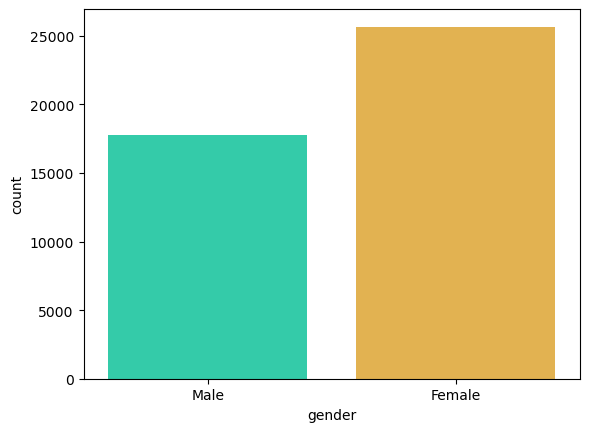

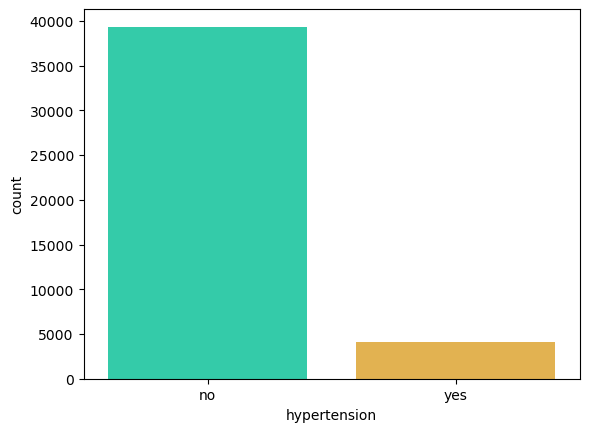

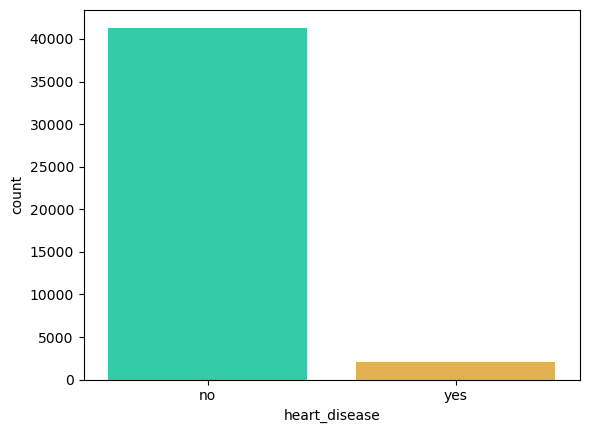

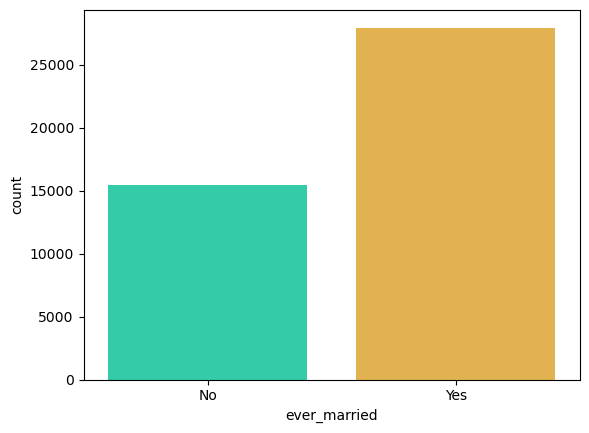

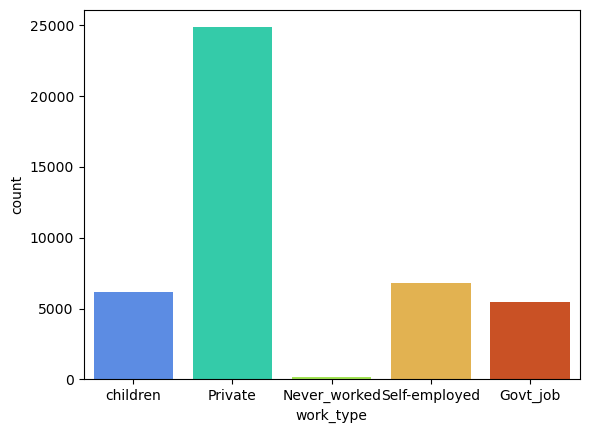

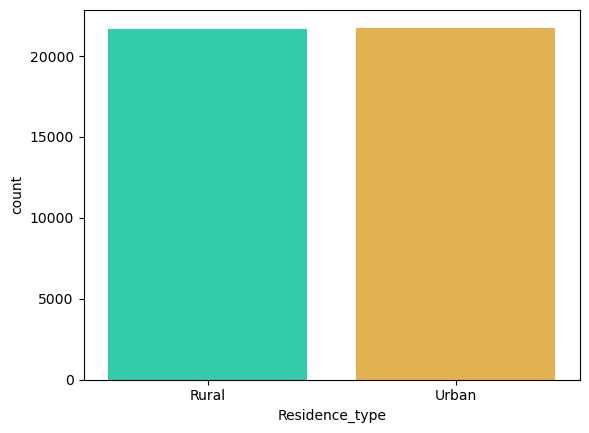

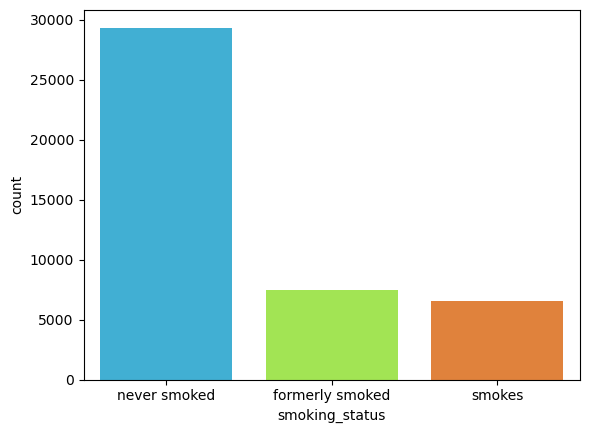

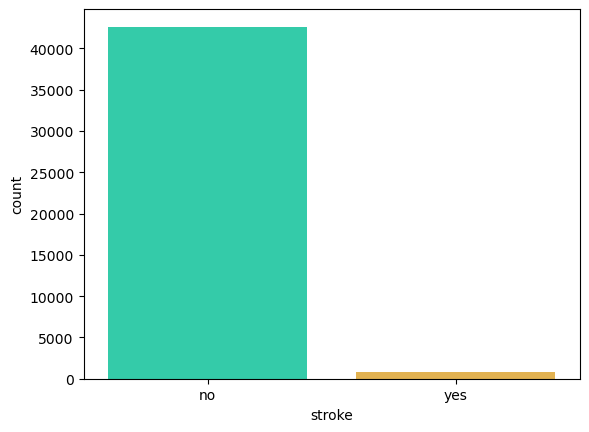

In [35]:
for i in cat:
    sns.countplot(x=cat[i],palette='turbo')
    plt.show()

### ***`Inference:`***
#### ***`1) Gender:`***
     Female: The bar for female is the highest
    Male: The bar for male is the second highest
    Other: The bar for other is the lowest
#### ***`2)Hypertension:`***
    The number of people with hypertension increases with age.
    The highest number of people with hypertension are in the 65-74 age group.
    The number of people with hypertension decreases slightly in the 75-84 age group.
#### ***`3)Heart Disease:`***
    The overall count of people with heart disease is higher for men than for women.
    The count of people with heart disease increases with age for both men and women.
    The largest difference in the count of people with heart disease between men and women is in the 75-84 age group.
#### ***`4)Ever Married:`***    
    The Average of people who maried are more in the dataset than the not maried.
    The count of the people who are unamrried is comparatively less than the people who are married
#### ***`5)Work_Type:`***
    The people who are working class are the highest
    Then followed by the self_employed as they are the second highest
    The people who never worked are the lowest of all
#### ***`6)Residence Type:`***
    The number of the people in the urban are maximum in this dataset
    The people who are living in the rural are little lower comparatively to the people living in urban
#### ***`7)Smoking_Status:`***
     The people smokes are minority in the sample
     The majority of the people who never smoked are the highest
     there are even the unknown where we dont know wether the person smokes or not which are in the second highest position
#### ***`8)Stroke:`***
     The majority have the people are not affected by the stroke besed on this past history
     The people who are affected by the stroke are the minority compared to the people who have the stroke
     
     
    
    


### ***`Bivariate Analysis:`***

### ***`categorical (target) vs numerical:`***

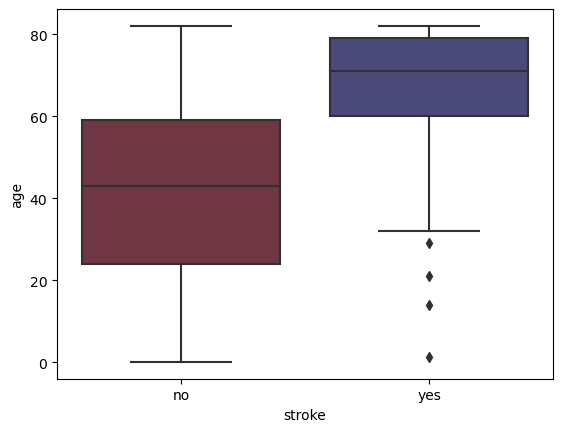

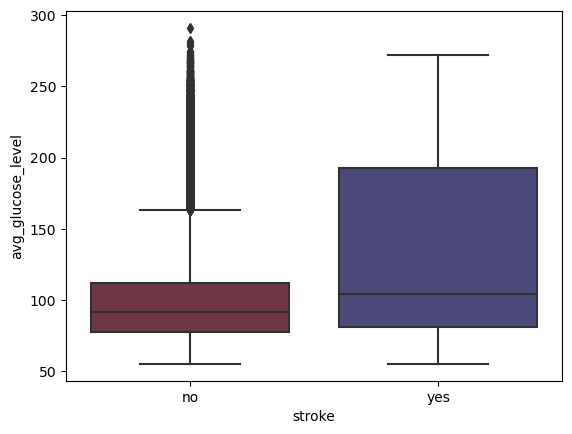

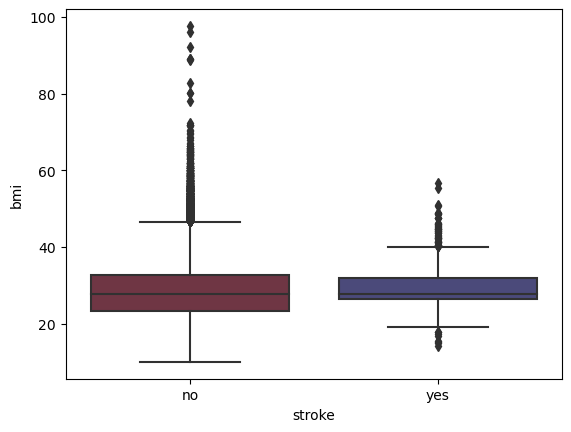

In [36]:
for i in num:
    sns.boxplot(x=stroke_data['stroke'],y=stroke_data[i],palette='icefire_r')
    plt.show()

### ***`Inference:`***
#### ***`1) Age VS Heart Stroke:`***
     The aged people are suffering from the stroke on compareing with the indviduals age less than 40
     The people with no stroke is the majority
    
#### ***`2)Hypertension VS Heart Stroke:`***
    The indviduals who are are having high glucose levels are more likely to get affected by the stroke
    The indviduals who are having less glucose level are not affected by the stroke comparing to higher glucose level
#### ***`3)Bmi VS Heart Stroke:`***
    The overall count of people with heart disease is higher for men than for women.
    The count of people with heart disease increases with age for both men and women.
    The largest difference in the count of people with heart disease between men and women is in the 75-84 age group.

#### ***`Categorical(Target) vs Categorical:`***

In [37]:
cat.columns

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')

Text(0.5, 1.0, 'Gender')

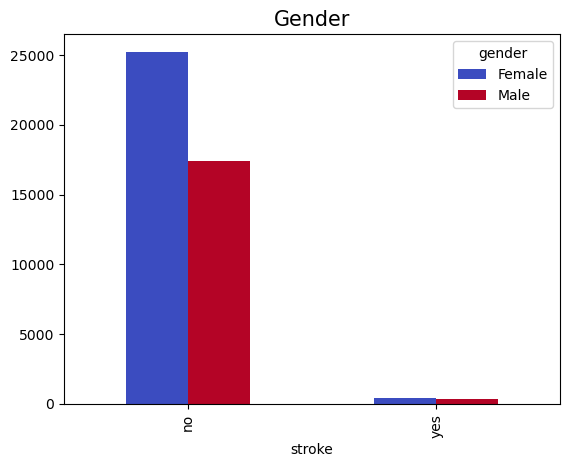

In [38]:
pd.crosstab(stroke_data['stroke'],cat['gender']).plot(kind='bar',colormap='coolwarm')
plt.title( 'Gender',fontsize=15)

### ***`Inference:`***
As per our data Female is getting stroke more compared to male  
Even Female is not getting stroke  from this we can conclude the count of female is more comapatred to male

Text(0.5, 1.0, 'hypertension')

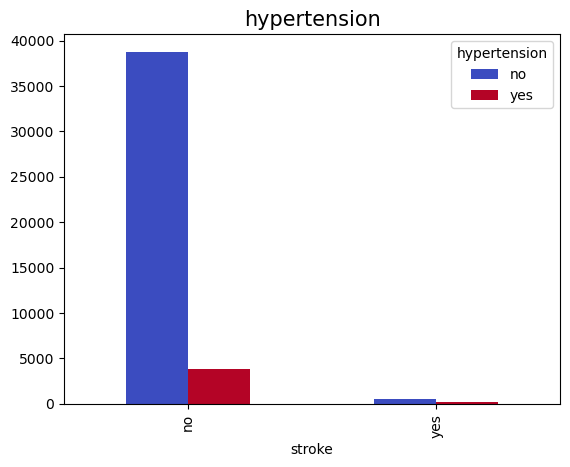

In [39]:
pd.crosstab(stroke_data['stroke'],cat['hypertension']).plot(kind='bar',colormap='coolwarm')
plt.title( 'hypertension',fontsize=15)

### ***`Inference:`***
People who are having  hypertension is getting Less stroke comapred to the people who are not having hypertension
The people having no hypertension and no stroke is higher on compareing with the people who is having stroke and hypertension

Text(0.5, 1.0, 'heart_disease')

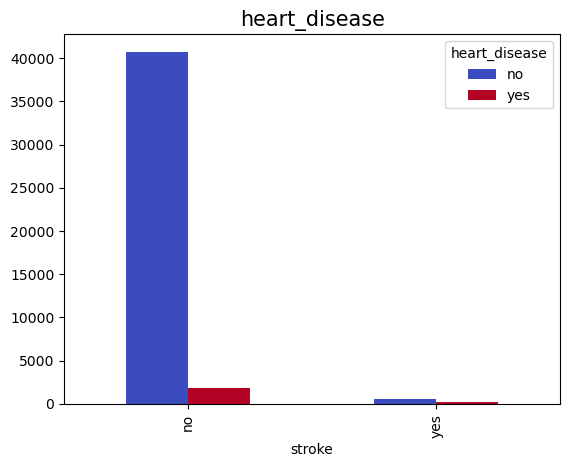

In [40]:
pd.crosstab(stroke_data['stroke'],cat['heart_disease']).plot(kind='bar',colormap='coolwarm')
plt.title( 'heart_disease',fontsize=15)

### ***`Inference:`***
People who are having not having heart_disease is getting Less stroke comapred to the people who are not having heart disease
Indviduals who is having heart disease is less in numbers compared with people who is not having heartdisease


Text(0.5, 1.0, 'ever_married')

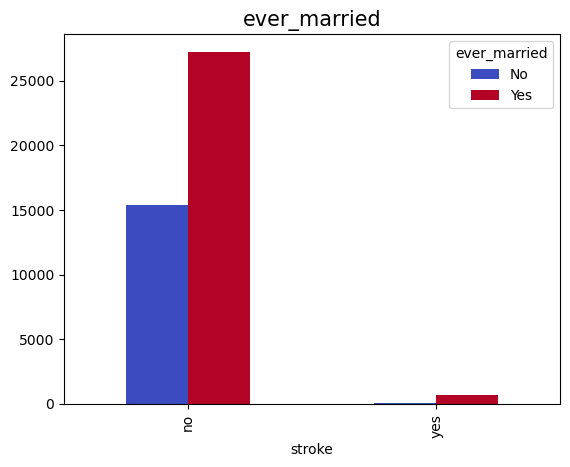

In [41]:
pd.crosstab(stroke_data['stroke'],cat['ever_married']).plot(kind='bar',colormap='coolwarm')
plt.title( 'ever_married',fontsize=15)

### ***`Inference:`***
Indviduals are who are married is getting more stroke compared to people who is not married
the married people is high in total than not married

Text(0.5, 1.0, 'work_type')

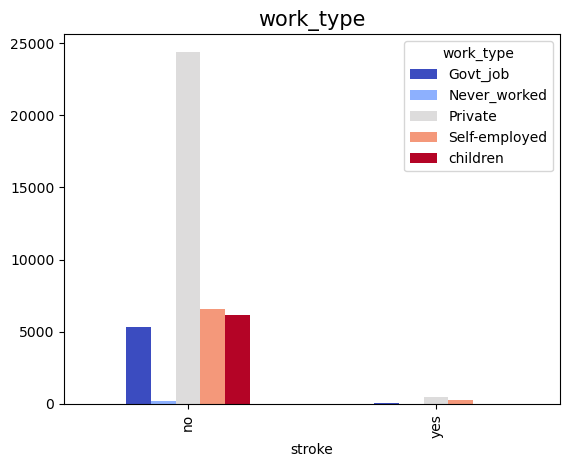

In [42]:
pd.crosstab(stroke_data['stroke'],cat['work_type']).plot(kind='bar',colormap='coolwarm')
plt.title( 'work_type',fontsize=15)

### ***`Inference:`***
the people who are working in the private is getting more stroke
Followed by the Self-employed who is getting stroke
the people who never works is not getting stroke comapred to the other categories

Text(0.5, 1.0, 'Residence_type')

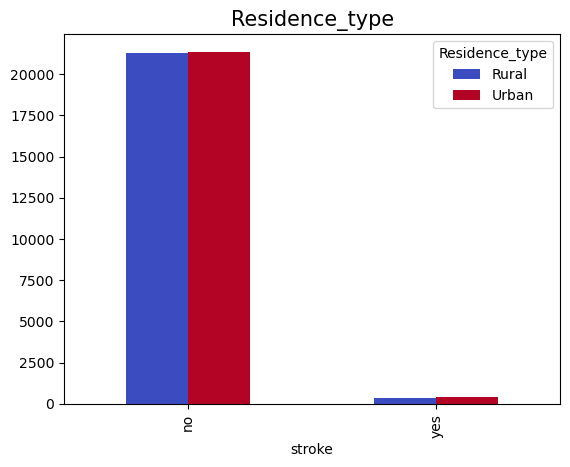

In [43]:
pd.crosstab(stroke_data['stroke'],cat['Residence_type']).plot(kind='bar',colormap='coolwarm')
plt.title( 'Residence_type',fontsize=15)

### ***`Inference:`***
the Indviduals living in the Urban is getting more stroke than who is living in rural though they are almost equal but higher on compareing with the indviduals who are living in the rural

Text(0.5, 1.0, 'smoking_status')

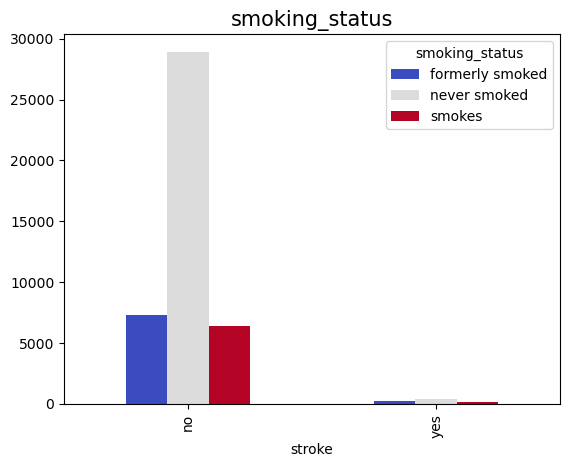

In [44]:
pd.crosstab(stroke_data['stroke'],cat['smoking_status']).plot(kind='bar',colormap='coolwarm')
plt.title( 'smoking_status',fontsize=15)

### ***`Inference:`***
the Indviduals who never smoked is getting stroke as per our data than the formal smokers and regular smokers
and they are very higher in the counts as compared to the other two subclasses who is not having stroke

#### ***`Multivariate Analysis 2 Categorical (Target)   vs 1 Numerical:`***

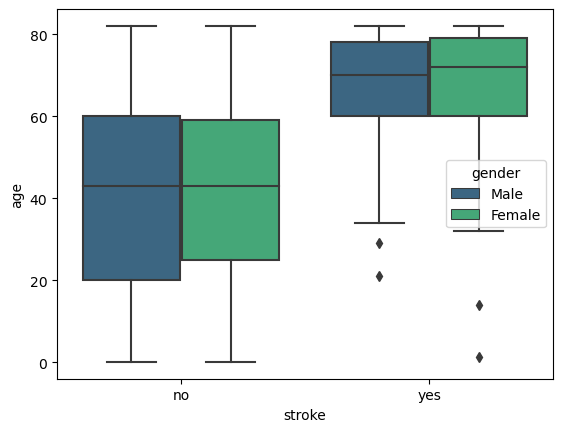

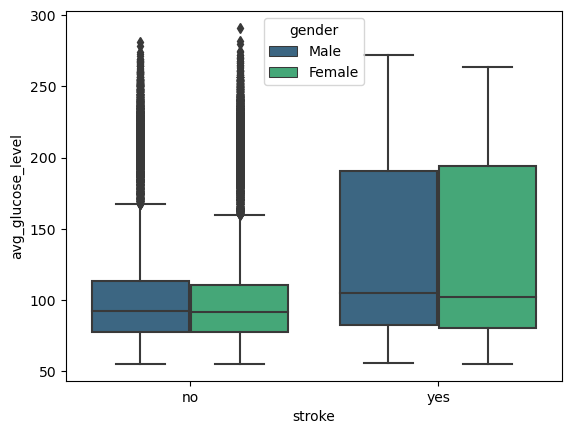

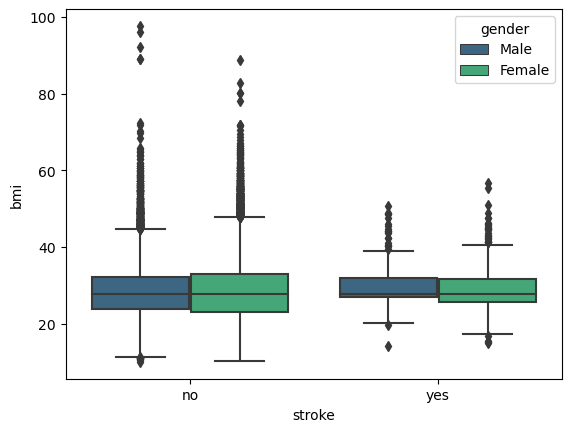

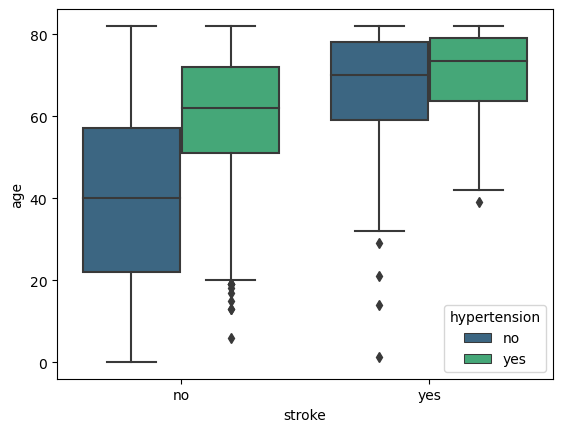

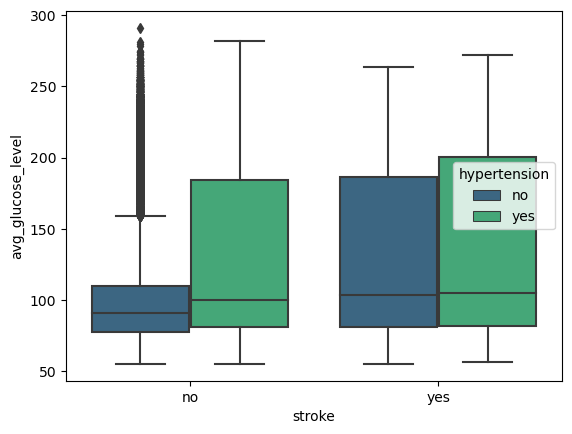

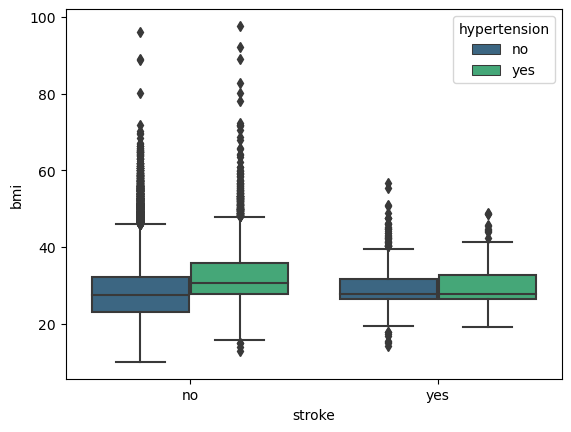

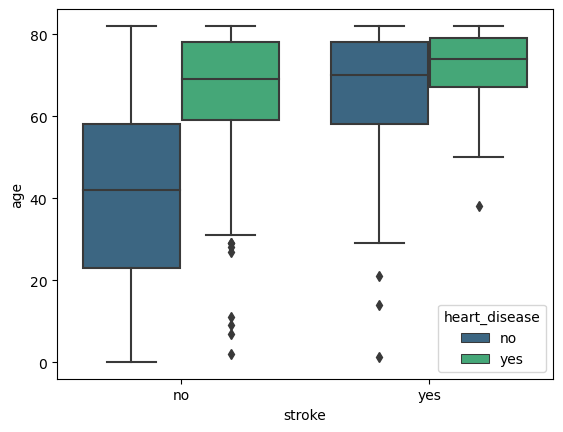

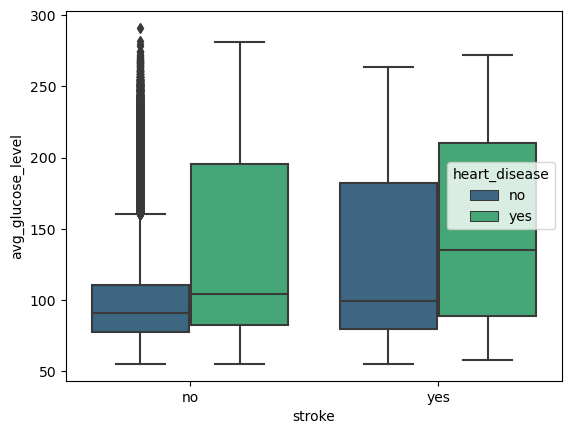

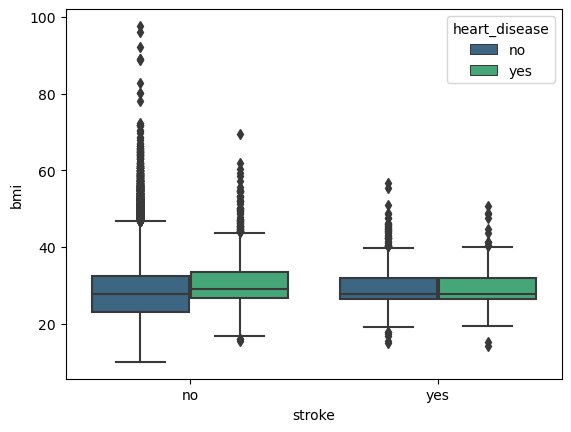

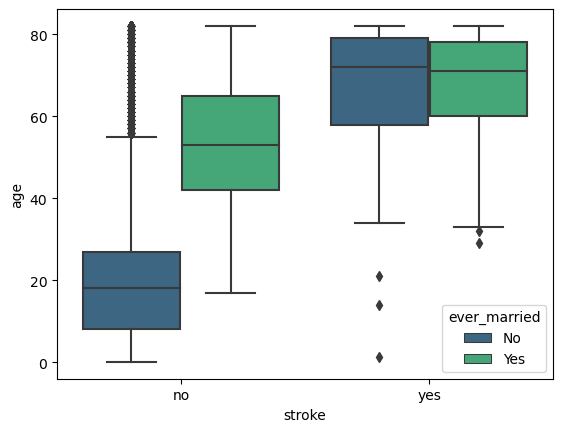

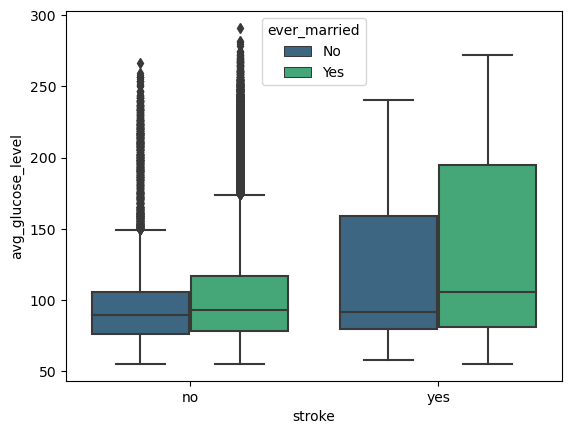

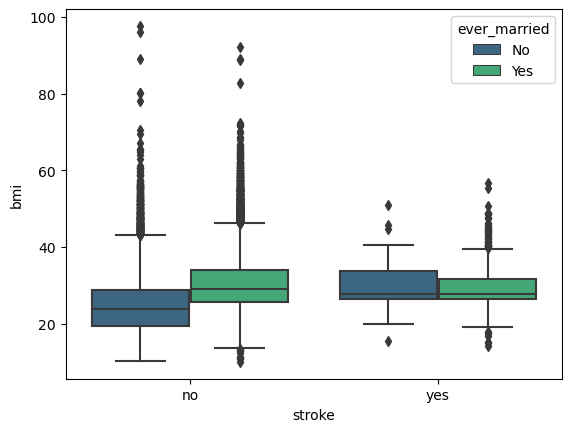

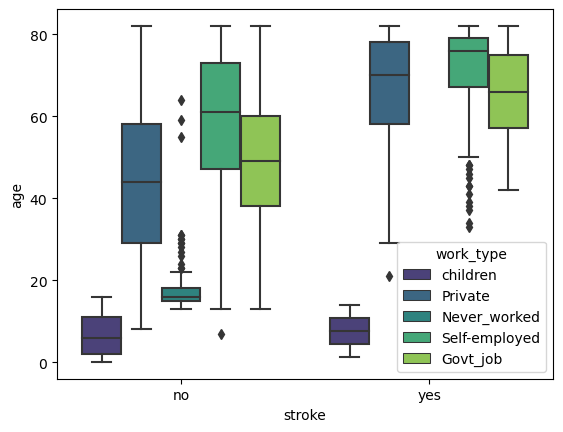

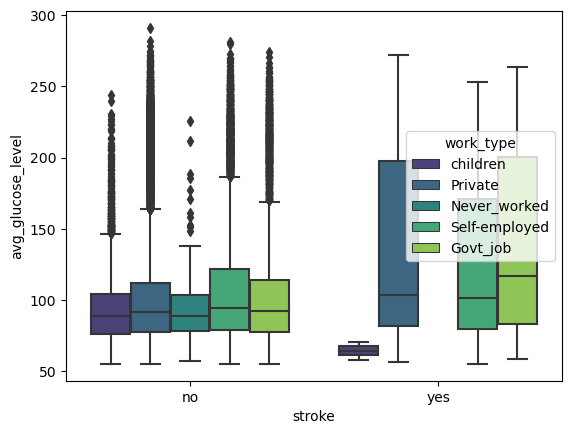

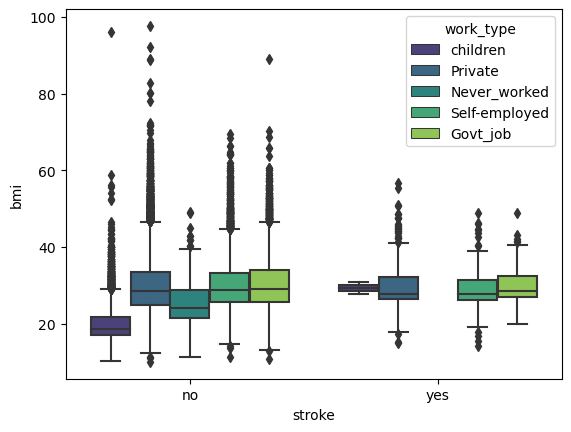

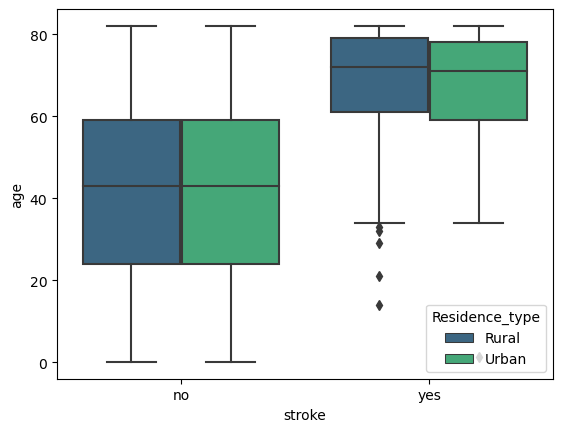

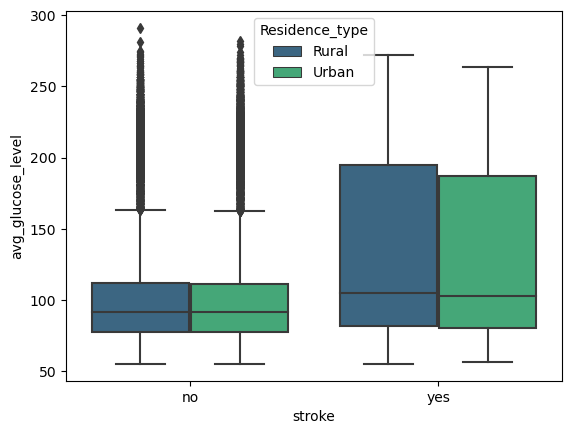

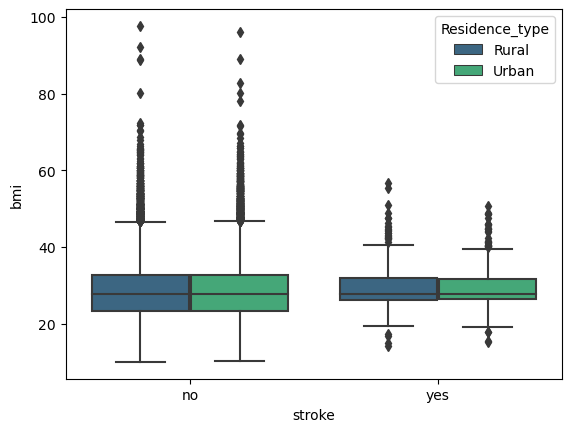

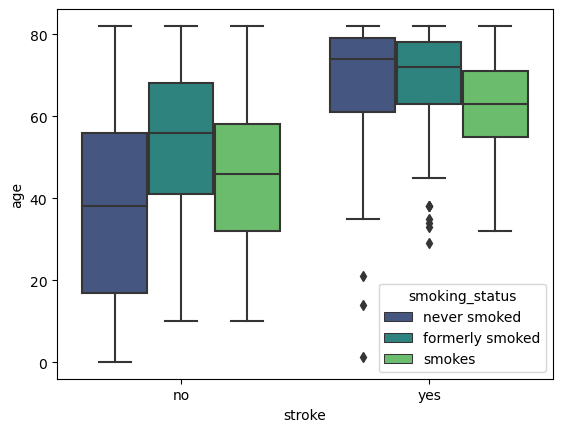

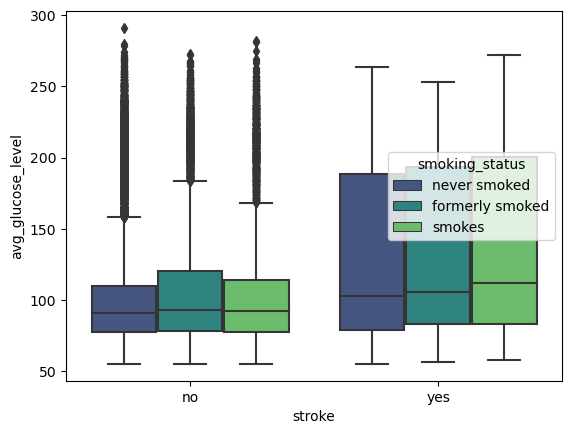

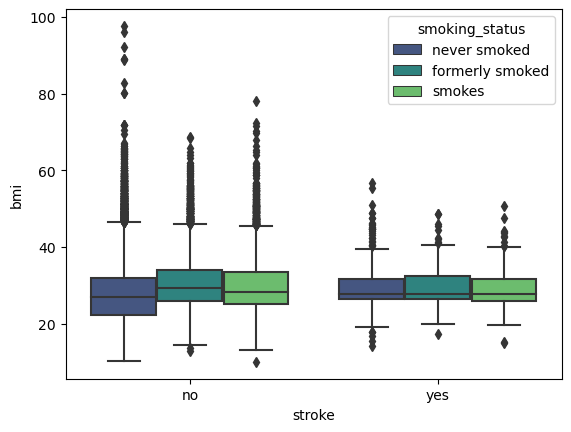

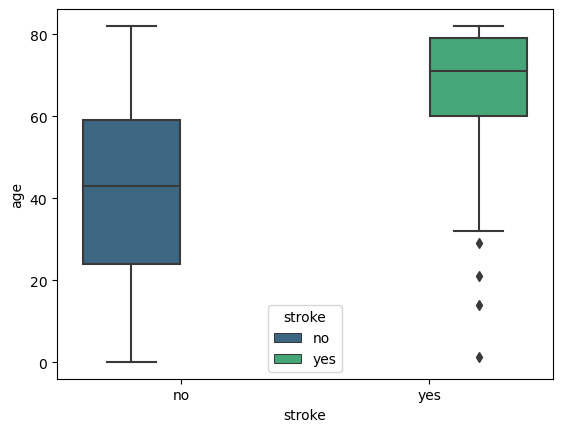

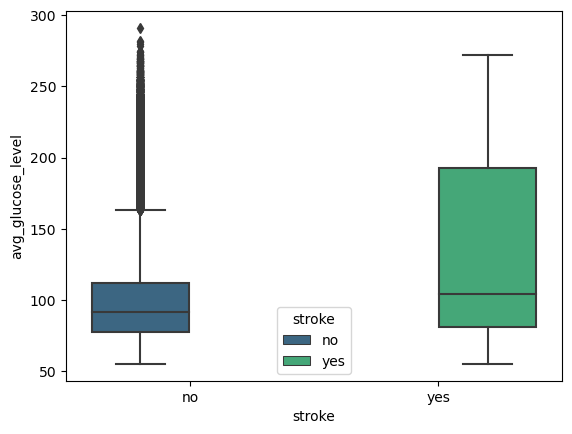

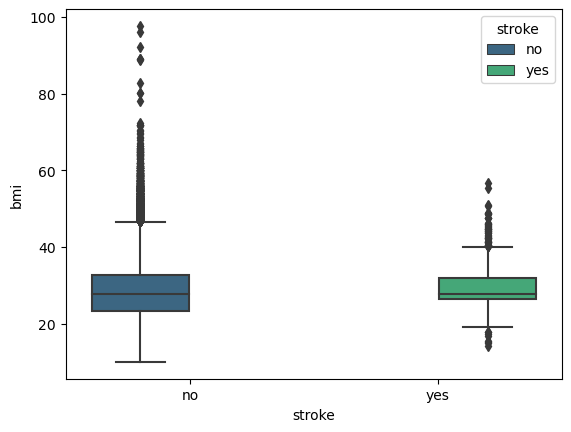

In [45]:
for i in cat:
    for j in num:
        sns.boxplot(x=stroke_data['stroke'],y=num[j],hue=cat[i],palette='viridis')
        plt.show()

### ***`Inference:`***
the Indviduals who never smoked is getting stroke as per our data than the formal smokers and regular smokers
and they are very higher in the counts as compared to the other two subclasses who is not having stroke

### ***`Statistical Analysis:`***

In [46]:
stroke_data.corr(method='pearson')

,age,avg_glucose_level,bmi
age,1.000000,0.237627,0.350231
avg_glucose_level,0.237627,1.000000,0.181899
bmi,0.350231,0.181899,1.000000


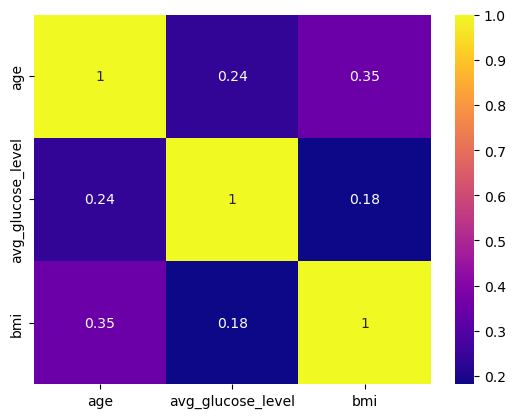

In [47]:
sns.heatmap(stroke_data.corr(),annot=True,cmap='plasma')
plt.show()

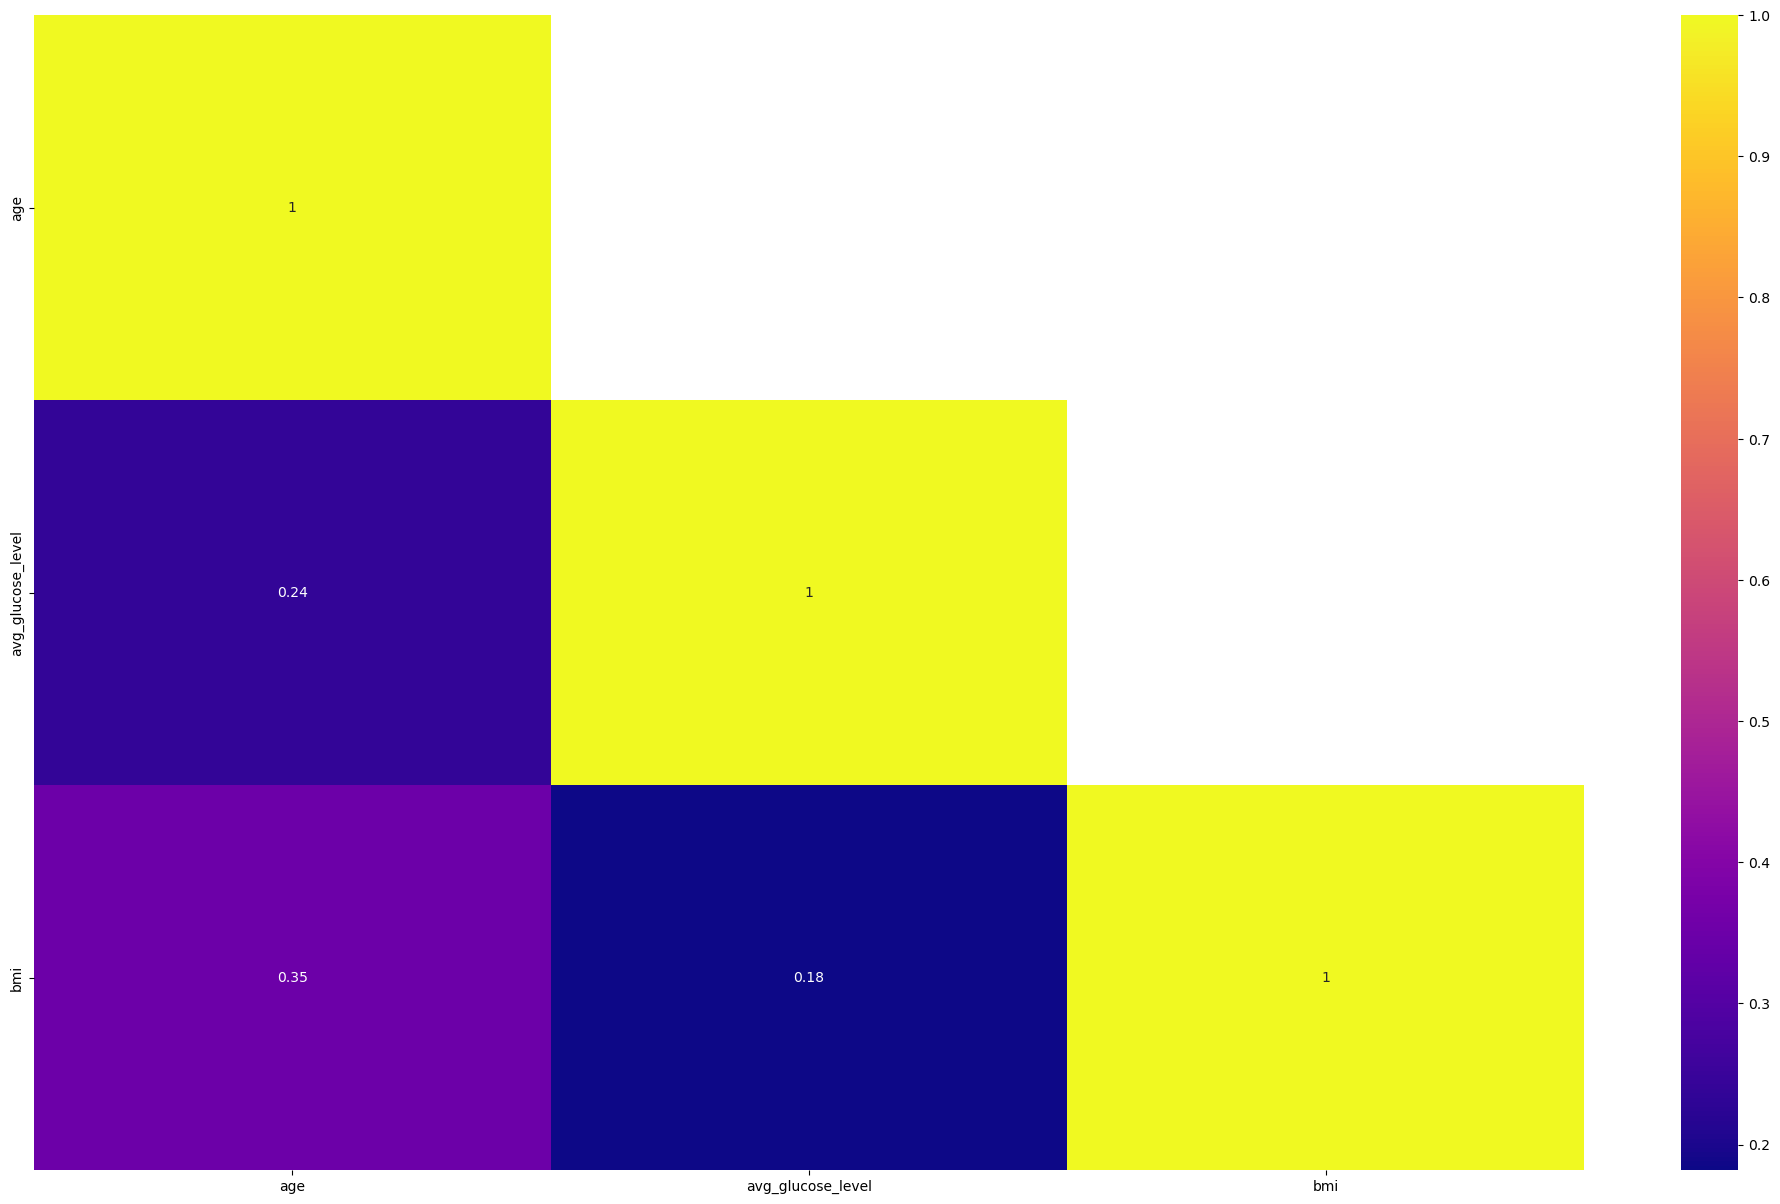

In [48]:
plt.figure(figsize=(25,15))
sns.heatmap(stroke_data.corr(),annot=True,cmap='plasma',mask=np.triu(stroke_data.corr(),+1))
plt.show()

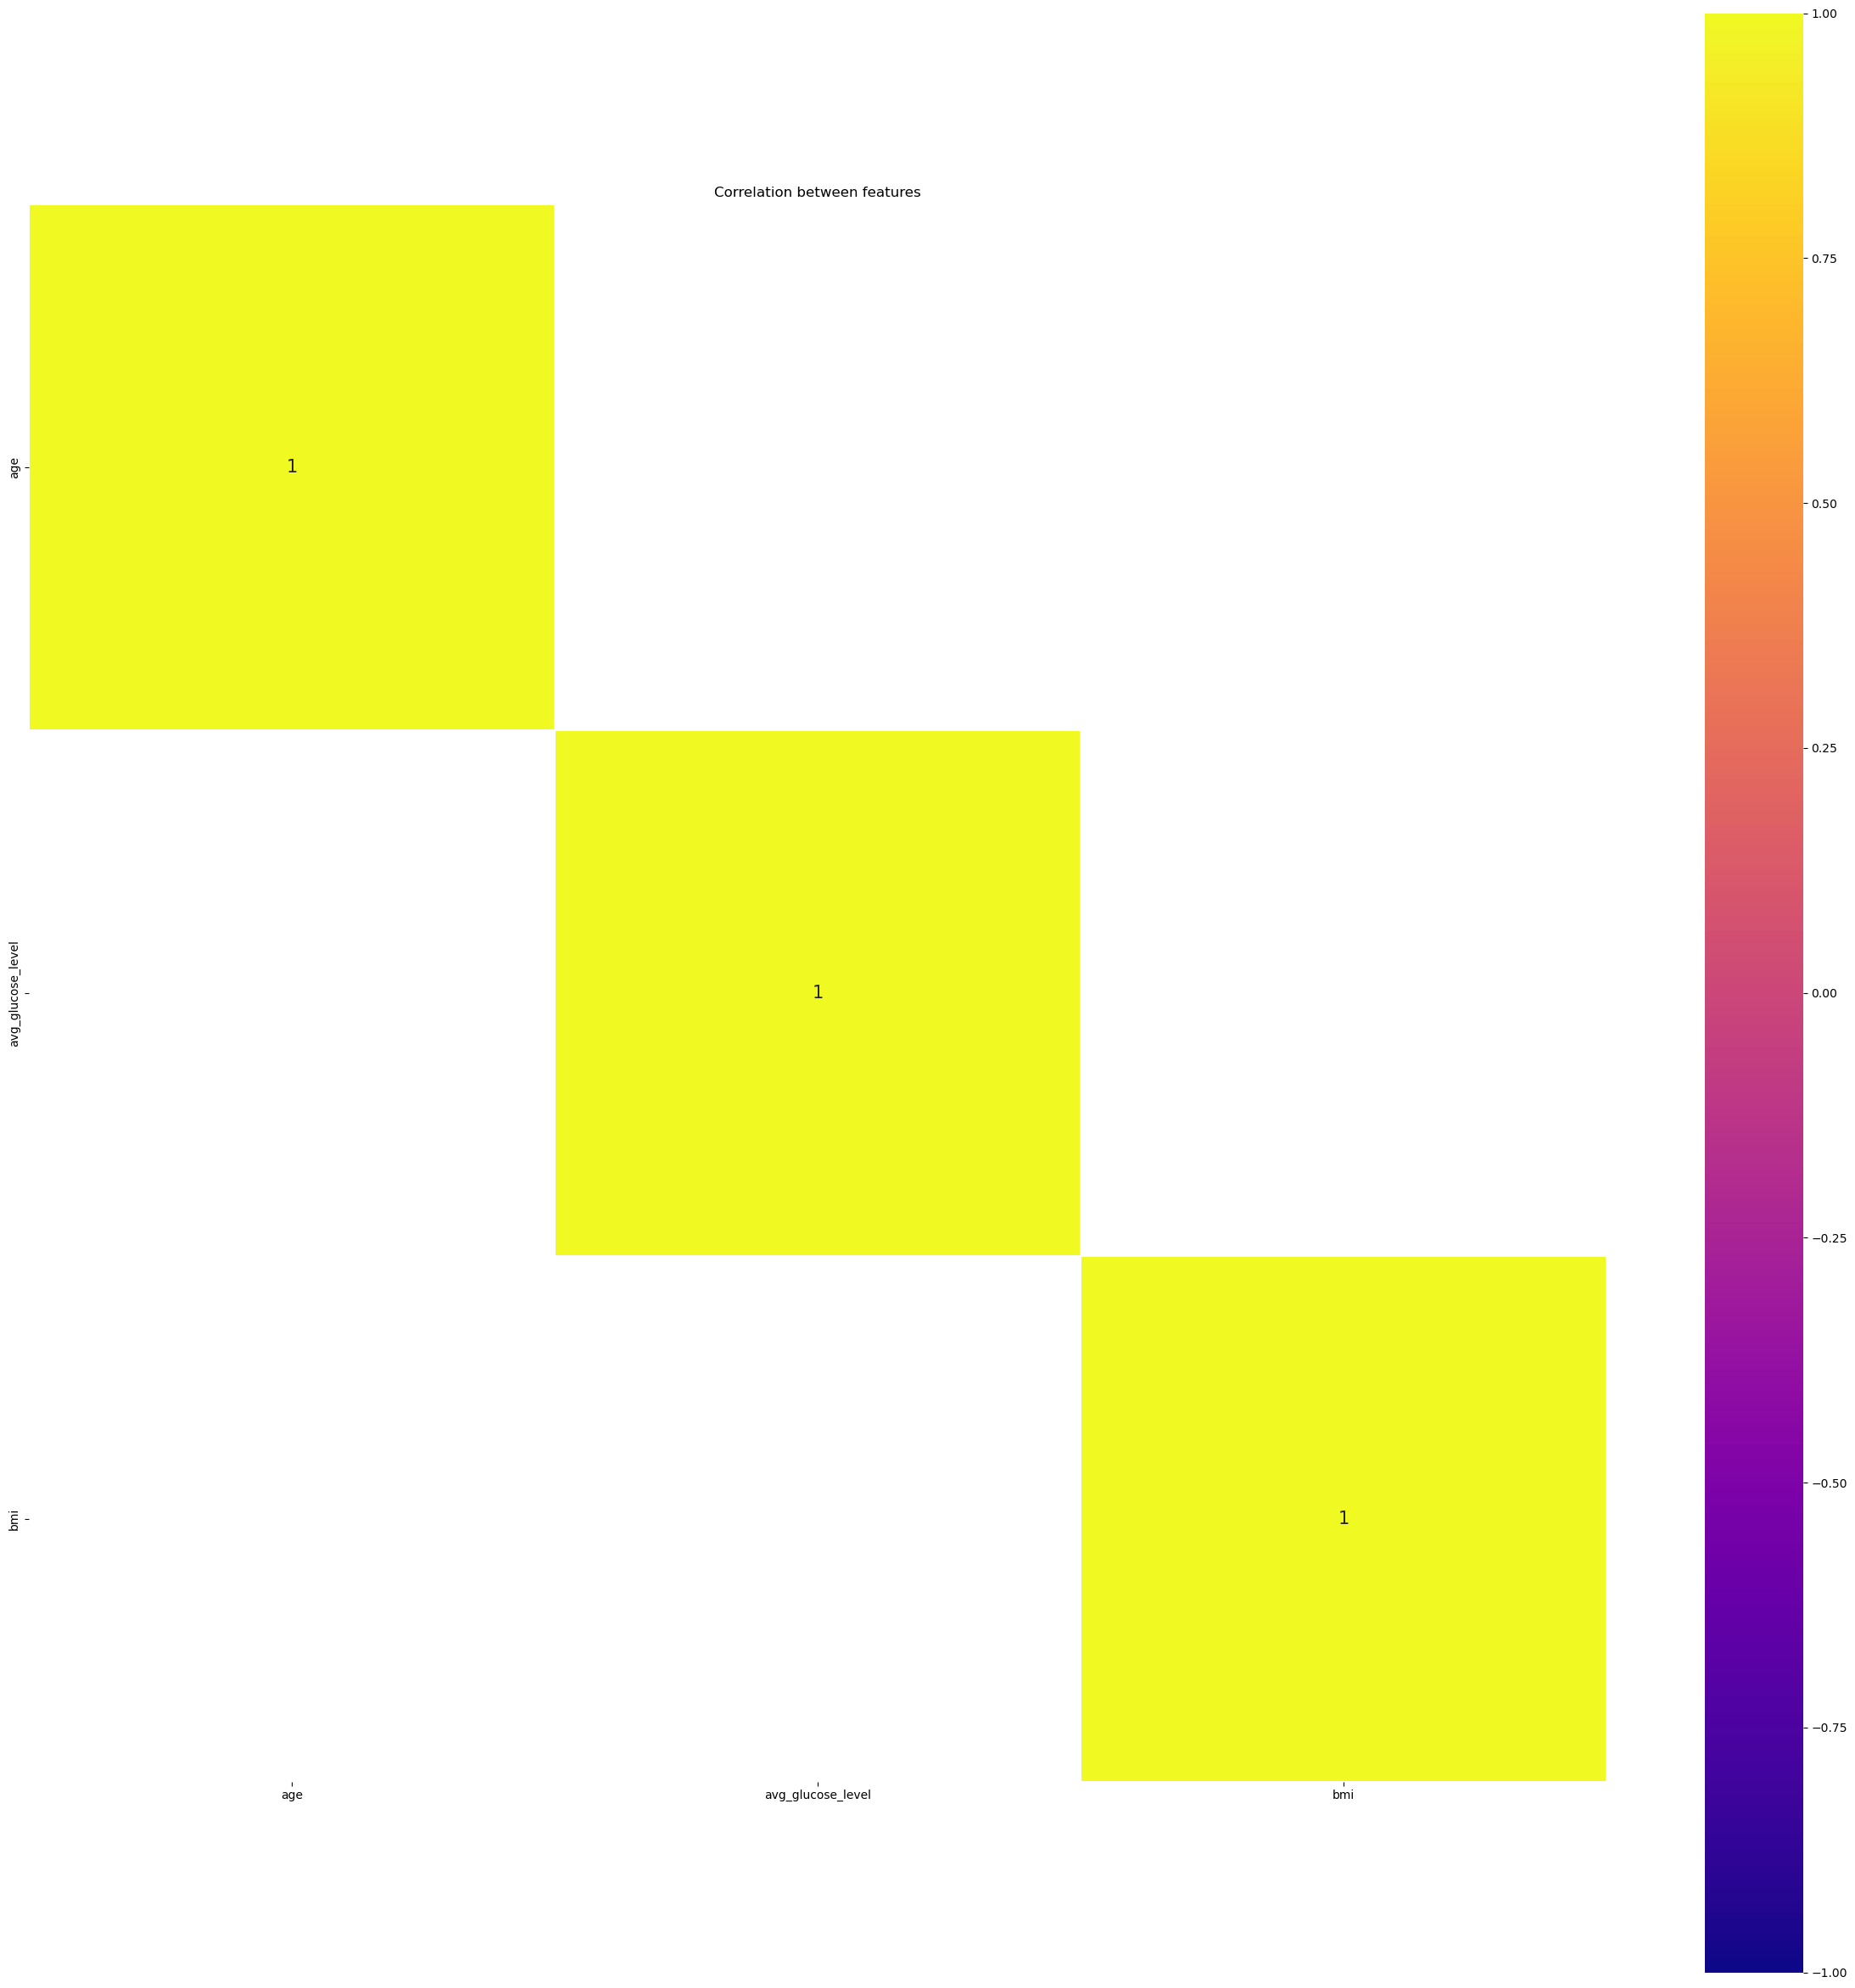

In [49]:
plt.figure(figsize=(30, 30))


sns.heatmap(stroke_data.corr()[(stroke_data.corr() >= 0.75) | (stroke_data.corr() <= -0.75)],
           cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linewidths=0.1,
            annot_kws={"size": 15},
            square=True);

plt.title('Correlation between features')
plt.show()

### ***`Inference:`***

1. **`Correlation between Age and Avg Glucose Level (0.2376):`** There is a positive correlation between age and average glucose level. This means that, on average, as age increases, the average glucose level tends to increase slightly. However, the correlation is relatively weak, indicating that the relationship is not very strong.

2. **`Correlation between Age and BMI (0.3522):`** There is a positive correlation between age and BMI (Body Mass Index). This suggests that, on average, as age increases, BMI tends to increase as well. This correlation is stronger than the correlation between age and average glucose level.

3. **`Correlation between Avg Glucose Level and BMI (0.1842):`** There is a positive correlation between average glucose level and BMI. This indicates that, on average, higher average glucose levels tend to be associated with higher BMI values. However, like the previous correlations, this one is also relatively weak.


## ***`STATISTICAL ANALYSIS AND APPROACH:`***

In [50]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.000000,no,no,No,children,Rural,95.120000,18.000000,never smoked,no
1,Male,58.000000,yes,no,Yes,Private,Urban,87.960000,39.200000,never smoked,no
2,Female,8.000000,no,no,No,Private,Urban,110.890000,17.600000,never smoked,no
3,Female,70.000000,no,no,Yes,Private,Rural,69.040000,35.900000,formerly smoked,no
4,Male,14.000000,no,no,No,Never_worked,Rural,161.280000,19.100000,never smoked,no


In [51]:
import scipy
from scipy import *

#### ***`Spearman R Correlation: (CON VS CON):`***

#### ***`Shapiro Test:`***

In [52]:
# Hypothesis Formation
# H0: The "age", "avg_glucose_level" and "bmi" columns follow a normal distribution.
# H1: The "age", "avg_glucose_level" and "bmi" columns do not follow a normal distribution.

In [53]:
test_stat_age,pvalue_age = stats.shapiro(stroke_data["age"])
test_stat_glucose,pvalue_glucose = stats.shapiro(stroke_data["avg_glucose_level"])
test_stat_bmi,pvalue_bmi = stats.shapiro(stroke_data["bmi"])

print(test_stat_age,";",pvalue_age)
print(test_stat_glucose,";",pvalue_glucose)
print(test_stat_bmi,";",pvalue_bmi)

0.9686997532844543 ; 0.0
0.800417959690094 ; 0.0
0.9601031541824341 ; 0.0


In [54]:
if (pvalue_age < 0.05) & (pvalue_glucose < 0.05) & (pvalue_bmi < 0.05):
    print(pvalue_age,";",pvalue_glucose,";",pvalue_bmi,"Reject H0, concluding that age, avg_glucose_level and bmi are not normal.")
else:
    print(pvalue_age,";",pvalue_glucose,";",pvalue_bmi,"Failed to reject H0, concluding that age, avg_glucose_level and bmi are normal.")

0.0 ; 0.0 ; 0.0 Reject H0, concluding that age, avg_glucose_level and bmi are not normal.


#### ***`LEVENE TEST:`***

In [55]:
# Hypothesis Formation
# H0: The variances of the "age," "avg_glucose_level," and "bmi" columns are equal.
# H1: The variances of the "age," "avg_glucose_level," and "bmi" columns are not equal.

In [56]:
test_stat,pvalue = stats.levene(stroke_data["age"],stroke_data["avg_glucose_level"],stroke_data["bmi"])
if pvalue < 0.05:
    print(pvalue, "Reject H0, concluding that the variances are not equal.")
else:
    print(pvalue, "Failed to reject H0, concluding that the variances are equal.")

0.0 Reject H0, concluding that the variances are not equal.


#### ***The data is not normally distributed, and it does not have equal variance, so we perform non-parametric tests.***

#### ***`SPEARMAN R CORRELATION TEST:`***

In [57]:
# Hypothesis Formation
# NULL : age and avg_glucose_level are correlated
# Altr : age and avg_glucose_level are not correlated

In [58]:
test_stat,pvalue = stats.spearmanr(stroke_data["age"],stroke_data["avg_glucose_level"])
if pvalue < 0.05:
    print(pvalue,";", "Reject H0, concluding that age and average glucose level are not correlated.")
else:
    print(pvalue,";"," Failed to reject H0; age and average glucose level are correlated.")

5.86841915858354e-225 ; Reject H0, concluding that age and average glucose level are not correlated.


In [59]:
# Hypothesis Formation
# NULL : age and bmi are correlated
# Altr : age and bmi are not correlated

In [60]:
test_stat,pvalue = stats.spearmanr(stroke_data["age"],stroke_data["bmi"])
if pvalue < 0.05:
    print(pvalue,";", "Reject H0, concluding that age and bmi are not correlated.")
else:
    print(pvalue,";","Failed to reject H0; age and bmi are correlated.")

0.0 ; Reject H0, concluding that age and bmi are not correlated.


In [61]:
# Hypothesis Formation
# NULL : avg_glucose_level and bmi are correlated
# Altr : avg_glucose_level and bmi are not correlated

In [62]:
test_stat,pvalue = stats.spearmanr(stroke_data["avg_glucose_level"],stroke_data["bmi"])
if pvalue < 0.05:
    print(pvalue,";", "Reject H0, concluding that avg_glucose_level and bmi are not correlated.")
else:
    print(pvalue,";","Failed to reject H0; avg_glucose_level and bmi are correlated.")

5.985962297795723e-127 ; Reject H0, concluding that avg_glucose_level and bmi are not correlated.


#### ***`MANN-WHITNEY U: (CONT VS CAT =2 SUB GROUPS)`***

### ***`Age vs Stroke:`***

In [63]:
stroke_data["stroke"].unique()

array(['no', 'yes'], dtype=object)

In [64]:
stroke_age = stroke_data[stroke_data["stroke"]=="yes"]["age"]
no_stroke_age = stroke_data[stroke_data["stroke"]=="no"]["age"]

### ***`SHAPIRO TEST`***

In [65]:
#h0: The age distribution is normally distributed within both the 'stroke' and 'no stroke' subgroups
#h1: The age distribution is not normally distributed within both the 'stroke' and 'no stroke' subgroups

In [66]:
test_staty,pvaluey = stats.shapiro(stroke_age)
test_statn,pvaluen = stats.shapiro(no_stroke_age)

print(test_staty,pvaluey)
print(test_statn,pvaluen)

0.8922845125198364 5.87619963944235e-23
0.9699695110321045 0.0


In [67]:
if (pvaluey < 0.05) & (pvaluen < 0.05):
    print(pvaluey,";",pvaluen,": Reject H0, concluding that 'stroke' and 'age' are not normally distributed.")
else:
    print(pvaluey,";",pvaluen,": Failed to reject H0, concluding that 'stroke' and 'age' are normally distributed.")

5.87619963944235e-23 ; 0.0 : Reject H0, concluding that 'stroke' and 'age' are not normally distributed.


### ***`LEVENE TEST:`***

In [68]:
# Hypothesis Formation
# H0: The variances of age between (stroke vs. no stroke) are equal.
# H1: The variances of age between (stroke vs. no stroke) are not equal.

In [69]:
test_statlyn,pvalueyn = stats.levene(stroke_age,no_stroke_age)
if pvalue < 0.05:
    print(pvalueyn, "Reject H0: The variances are not equal.")
else:
    print(pvalueyn," Failed to reject H0: The variances are equal.")

5.802087755032389e-100 Reject H0: The variances are not equal.


### ***`Mann-Whitney U Test:`***

In [70]:
# Hypothesis Formation
# H0: There is no significant difference in the distribution of age between (stroke vs. no stroke).
# H1: There is a significant difference in the distribution of age between (stroke vs. no stroke).

In [71]:
test_stat,pvalueyn = stats.mannwhitneyu(stroke_age,no_stroke_age)
if pvalue < 0.05:
    print(pvalueyn, ":Reject H0; there is a significant difference in the distribution of age between the two groups (stroke vs. no stroke).")
else:
    print(pvalueyn,"Failed to reject H0; there is no significant difference in the distribution of age between the two groups (stroke vs. no stroke).")

1.6841121075515482e-234 :Reject H0; there is a significant difference in the distribution of age between the two groups (stroke vs. no stroke).


### ***`BMI VS STROKE:`***

In [72]:
stroke_bmi = stroke_data[stroke_data["stroke"]=="yes"]["bmi"]
no_stroke_bmi = stroke_data[stroke_data["stroke"]=="no"]["bmi"]

### ***`SHAPIRO TEST:`***

In [73]:
# H0: The "stroke" and "bmi" columns follow a normal distribution.
# H1: The "stroke" and "bmi" columns do not follow a normal distribution.

In [74]:
test_staty,pvaluey = stats.shapiro(stroke_bmi)
test_statn,pvaluen = stats.shapiro(no_stroke_bmi)

print(test_staty,pvaluey)
print(test_statn,pvaluen)

0.9275783896446228 5.596789327534455e-19
0.9601484537124634 0.0


In [75]:
if (pvaluey < 0.05) and (pvaluen < 0.05):
    print(pvaluey, ";", pvaluen, "Reject H0, concluding that stroke and bmi are not normal.")
else:
    print(pvaluey, ";", pvaluen, "Failed to reject H0, concluding that stroke and bmi are normal.")

5.596789327534455e-19 ; 0.0 Reject H0, concluding that stroke and bmi are not normal.


### ***`LEVENE TEST:`***

In [76]:
# Hypothesis Formation
# H0: The variances of bmi between (stroke vs. no stroke) are equal.
# H1: The variances of bmi between (stroke vs. no stroke) are not equal.

In [77]:
test_statlyn,pvalueyn = stats.levene(stroke_bmi,no_stroke_bmi)
if pvalue < 0.05:
    print(pvalueyn, "Reject H0: The variances are not equal.")
else:
    print(pvalueyn," Failed to reject H0: The variances are equal.")

6.596394833911685e-21 Reject H0: The variances are not equal.


### ***`Mann-Whitney U Test:`***

In [78]:
# Hypothesis Formation
# H0: There is no significant difference in the distribution of bmi between (stroke vs. no stroke).
# H1: There is a significant difference in the distribution of bmi between (stroke vs. no stroke).

In [79]:
test_stat,pvalueyn = stats.mannwhitneyu(stroke_bmi,no_stroke_bmi)
if pvalue < 0.05:
    print(pvalueyn, ":Reject H0; there is a significant difference in the distribution of age between the two groups (stroke vs. no stroke).")
else:
    print(pvalueyn,"Failed to reject H0; there is no significant difference in the distribution of age between the two groups (stroke vs. no stroke).")

4.852753050554225e-07 :Reject H0; there is a significant difference in the distribution of age between the two groups (stroke vs. no stroke).


#### ***`AVG_GLUCOSE_LEVEL VS STROKE:`***

In [80]:
stroke_glucose = stroke_data[stroke_data["stroke"]=="yes"]["avg_glucose_level"]
no_stroke_glucose = stroke_data[stroke_data["stroke"]=="no"]["avg_glucose_level"]

### ***`SHAPIRO TEST:`***

In [81]:
# H0: The "stroke" and "avg_glucose_level" columns follow a normal distribution.
# H1: The "stroke" and "avg_glucose_level" columns do not follow a normal distribution.

In [82]:
test_staty,pvaluey = stats.shapiro(stroke_glucose)
test_statn,pvaluen = stats.shapiro(no_stroke_glucose)

print(test_staty,pvaluey)
print(test_statn,pvaluen)

0.866649866104126 2.891305133165337e-25
0.7996752262115479 0.0


In [83]:
if (pvaluey < 0.05) and (pvaluen < 0.05):
    print(pvaluey, ";", pvaluen, "Reject H0, concluding that stroke and bmi are not normal.")
else:
    print(pvaluey, ";", pvaluen, "Failed to reject H0, concluding that stroke and bmi are normal.")

2.891305133165337e-25 ; 0.0 Reject H0, concluding that stroke and bmi are not normal.


### ***`LEVENE TEST:`***

In [84]:
# Hypothesis Formation
# H0: The variances of avg_glucose_level between (stroke vs. no stroke) are equal.
# H1: The variances of avg_glucose_level| between (stroke vs. no stroke) are not equal.

In [85]:
test_statlyn,pvalueyn = stats.levene(stroke_glucose,no_stroke_glucose)
if pvalue < 0.05:
    print(pvalueyn, "Reject H0: The variances are not equal.")
else:
    print(pvalueyn," Failed to reject H0: The variances are equal.")

3.0224597361655913e-63 Reject H0: The variances are not equal.


### ***`Mann-Whitney U Test:`***

In [86]:
# Hypothesis Formation
# H0: There is no significant difference in the distribution of bmi between (stroke vs. no stroke).
# H1: There is a significant difference in the distribution of bmi between (stroke vs. no stroke).

In [87]:
test_stat,pvalueyn = stats.mannwhitneyu(stroke_glucose,no_stroke_glucose)
if pvalue < 0.05:
    print(pvalueyn, ":Reject H0; there is a significant difference in the distribution of age between the two groups (stroke vs. no stroke).")
else:
    print(pvalueyn,"Failed to reject H0; there is no significant difference in the distribution of age between the two groups (stroke vs. no stroke).")

5.1956594471853256e-24 :Reject H0; there is a significant difference in the distribution of age between the two groups (stroke vs. no stroke).


### ***`KRUSKAL-WALLIS: (CONT VS CAT >2 SUB GROUPS)`***

#### ***`WORK TYPE:`***

#### ***`AGE VS WORK TYPE:`***

In [88]:
# Hypothesis Formation
# H0: Medians are equal
# H1: Medians are not equal

In [89]:
stroke_data["work_type"].unique()

child_worktype = stroke_data[stroke_data["work_type"]=="children"]["age"]
private_worktype = stroke_data[stroke_data["work_type"]=="Private"]["age"]
never_worked_worktype = stroke_data[stroke_data["work_type"]=="Never_worked"]["age"]
self_employed_worktype = stroke_data[stroke_data["work_type"]=="Self-employed"]["age"]
govt_job_worktype = stroke_data[stroke_data["work_type"]=="Govt_job"]["age"]

In [90]:
test_stat,pvalue = stats.kruskal(child_worktype,private_worktype,never_worked_worktype,self_employed_worktype,govt_job_worktype)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant difference in median age across work types.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant difference in median age across work types.")

0.0 ; Reject H0: There is a significant difference in median age across work types.


#### ***`BMI VS WORK TYPE:`***

In [91]:
stroke_data["work_type"].unique()

child_worktype = stroke_data[stroke_data["work_type"]=="children"]["bmi"]
private_worktype = stroke_data[stroke_data["work_type"]=="Private"]["bmi"]
never_worked_worktype = stroke_data[stroke_data["work_type"]=="Never_worked"]["bmi"]
self_employed_worktype = stroke_data[stroke_data["work_type"]=="Self-employed"]["bmi"]
govt_job_worktype = stroke_data[stroke_data["work_type"]=="Govt_job"]["bmi"]

In [92]:
test_stat,pvalue = stats.kruskal(child_worktype,private_worktype,never_worked_worktype,self_employed_worktype,govt_job_worktype)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant difference in median age across work types.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant difference in median age across work types.")

0.0 ; Reject H0: There is a significant difference in median age across work types.


#### ***`AVG_GLUCOSE_LEVEL VS WORK TYPE:`***

In [93]:
stroke_data["work_type"].unique()

child_worktype = stroke_data[stroke_data["work_type"]=="children"]["avg_glucose_level"]
private_worktype = stroke_data[stroke_data["work_type"]=="Private"]["avg_glucose_level"]
never_worked_worktype = stroke_data[stroke_data["work_type"]=="Never_worked"]["avg_glucose_level"]
self_employed_worktype = stroke_data[stroke_data["work_type"]=="Self-employed"]["avg_glucose_level"]
govt_job_worktype = stroke_data[stroke_data["work_type"]=="Govt_job"]["avg_glucose_level"]

In [94]:
test_stat,pvalue = stats.kruskal(child_worktype,private_worktype,never_worked_worktype,self_employed_worktype,govt_job_worktype)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant difference in median age across work types.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant difference in median age across work types.")

8.351051159565099e-64 ; Reject H0: There is a significant difference in median age across work types.


### ***`SMOKING STATUS:`***

#### ***`AGE VS SMOKING STATUS:`***

In [95]:
stroke_data["smoking_status"].unique()

never_smoking_status = stroke_data[stroke_data["smoking_status"]=="never smoked"]["age"]
formerly_smoking_status = stroke_data[stroke_data["smoking_status"]=="formerly smoked"]["age"]
smokes_smoking_status = stroke_data[stroke_data["smoking_status"]=="smokes"]["age"]

In [96]:
test_stat,pvalue = stats.kruskal(never_smoking_status,formerly_smoking_status,smokes_smoking_status)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant difference in median age across work types.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant difference in median age across work types.")

0.0 ; Reject H0: There is a significant difference in median age across work types.


#### ***`BMI VS SMOKING STATUS:`***

In [97]:
never_smoking_status = stroke_data[stroke_data["smoking_status"]=="never smoked"]["bmi"]
formerly_smoking_status = stroke_data[stroke_data["smoking_status"]=="formerly smoked"]["bmi"]
smokes_smoking_status = stroke_data[stroke_data["smoking_status"]=="smokes"]["bmi"]

In [98]:
test_stat,pvalue = stats.kruskal(never_smoking_status,formerly_smoking_status,smokes_smoking_status)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant difference in median age across work types.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant difference in median age across work types.")

9.09587971257443e-272 ; Reject H0: There is a significant difference in median age across work types.


#### ***`AVG_GLUCOSE_LEVEL VS SMOKING STATUS:`***

In [99]:
never_smoking_status = stroke_data[stroke_data["smoking_status"]=="never smoked"]["avg_glucose_level"]
formerly_smoking_status = stroke_data[stroke_data["smoking_status"]=="formerly smoked"]["avg_glucose_level"]
smokes_smoking_status = stroke_data[stroke_data["smoking_status"]=="smokes"]["avg_glucose_level"]

In [100]:
test_stat,pvalue = stats.kruskal(never_smoking_status,formerly_smoking_status,smokes_smoking_status)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant difference in median age across work types.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant difference in median age across work types.")

5.897539013713478e-21 ; Reject H0: There is a significant difference in median age across work types.


### ***`CHI-SQUARE (CAT VS CAT):`***

### ***`GENDER VS STROKE:`***

In [101]:
# Hypothesis Formation
# h0: There is no significant relationship between gender and stroke.
# h1: There is a significant relationship between gender and stroke.

In [102]:
observed = pd.crosstab(stroke_data["stroke"],stroke_data["gender"],margins=True)
observed

gender,Female,Male,All
stroke,,,
no,25234,17383,42617
yes,431,352,783
All,25665,17735,43400


In [103]:
expected = stats.chi2_contingency(observed)
expected

Chi2ContingencyResult(statistic=5.523146377456285, pvalue=0.23770237393167473, dof=4, expected_freq=array([[25201.965553, 17415.034447, 42617.      ],
       [  463.034447,   319.965553,   783.      ],
       [25665.      , 17735.      , 43400.      ]]))

In [104]:
pvalue = stats.chi2.sf(5.523146377456285,4)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant relationship between gender and stroke.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant relationship between gender and stroke.")

0.23770237393167473 ; Failed to reject H0: There is no significant relationship between gender and stroke.


### ***`HYPERTENSION VS STROKE:`***

In [105]:
# Hypothesis Formation
# h0: There is no significant relationship between hypertension and stroke.
# h1: There is a significant relationship between hypertension and stroke.

In [106]:
observed = pd.crosstab(stroke_data["stroke"],stroke_data["hypertension"],margins=True)
observed

hypertension,no,yes,All
stroke,,,
no,38756,3861,42617
yes,583,200,783
All,39339,4061,43400


In [107]:
expected = stats.chi2_contingency(observed)
expected

Chi2ContingencyResult(statistic=246.29273075132315, pvalue=4.093992664554738e-52, dof=4, expected_freq=array([[38629.26642857,  3987.73357143, 42617.        ],
       [  709.73357143,    73.26642857,   783.        ],
       [39339.        ,  4061.        , 43400.        ]]))

In [108]:
pvalue = stats.chi2.sf(246.29273075132315,4)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant relationship between hypertension and stroke.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant relationship between hypertension and stroke.")

4.093992664554738e-52 ; Reject H0: There is a significant relationship between hypertension and stroke.


### ***`HEART DISEASE VS STROKE:`***

In [109]:
# Hypothesis Formation
# h0: There is no significant relationship between heart_disease and stroke.
# h1: There is a significant relationship between heart_disease and stroke.

In [110]:
observed = pd.crosstab(stroke_data["stroke"],stroke_data["heart_disease"],margins=True)
observed

heart_disease,no,yes,All
stroke,,,
no,40732,1885,42617
yes,606,177,783
All,41338,2062,43400


In [111]:
expected = stats.chi2_contingency(observed)
expected

Chi2ContingencyResult(statistic=561.6830578575061, pvalue=3.0344408978253642e-120, dof=4, expected_freq=array([[4.05922015e+04, 2.02479848e+03, 4.26170000e+04],
       [7.45798479e+02, 3.72015207e+01, 7.83000000e+02],
       [4.13380000e+04, 2.06200000e+03, 4.34000000e+04]]))

In [112]:
pvalue = stats.chi2.sf(561.6830578575061,4)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant relationship between heart_disease and stroke.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant relationship between heart_disease and stroke.")

3.0344408978253642e-120 ; Reject H0: There is a significant relationship between heart_disease and stroke.


### ***`EVER MARRIED VS STROKE:`***

In [113]:
# Hypothesis Formation
# h0: There is no significant relationship between ever_married and stroke.
# h1: There is a significant relationship between ever_married and stroke.

In [114]:
observed = pd.crosstab(stroke_data["stroke"],stroke_data["ever_married"],margins=True)
observed

ever_married,No,Yes,All
stroke,,,
no,15382,27235,42617
yes,80,703,783
All,15462,27938,43400


In [115]:
expected = stats.chi2_contingency(observed)
expected

Chi2ContingencyResult(statistic=224.48288993100115, pvalue=2.0331303010557975e-47, dof=4, expected_freq=array([[15183.04271889, 27433.95728111, 42617.        ],
       [  278.95728111,   504.04271889,   783.        ],
       [15462.        , 27938.        , 43400.        ]]))

In [116]:
pvalue = stats.chi2.sf(224.48288993100115,4)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant relationship between ever_married and stroke.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant relationship between ever_married and stroke.")

2.0331303010557975e-47 ; Reject H0: There is a significant relationship between ever_married and stroke.


#### ***`RESIDENCE TYPE VS STROKE:`***

In [117]:
# Hypothesis Formation
# h0: There is no significant relationship between Residence_type and stroke.
# h1: There is a significant relationship between Residence_type and stroke.

In [118]:
observed = pd.crosstab(stroke_data["stroke"],stroke_data["Residence_type"],margins=True)
observed

Residence_type,Rural,Urban,All
stroke,,,
no,21260,21357,42617
yes,384,399,783
All,21644,21756,43400


In [119]:
expected = stats.chi2_contingency(observed)
expected

Chi2ContingencyResult(statistic=0.21910596269162097, pvalue=0.9944198604968396, dof=4, expected_freq=array([[21253.51032258, 21363.48967742, 42617.        ],
       [  390.48967742,   392.51032258,   783.        ],
       [21644.        , 21756.        , 43400.        ]]))

In [120]:
pvalue = stats.chi2.sf(0.21910596269162097,4)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant relationship between Residence_type and stroke.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant relationship between Residence_type and stroke.")

0.9944198604968396 ; Failed to reject H0: There is no significant relationship between Residence_type and stroke.


#### ***`WORK TYPE VS STROKE:`***

In [121]:
# Hypothesis Formation
# h0: There is no significant relationship between work_type and stroke.
# h1: There is a significant relationship between work_type and stroke.

In [122]:
observed = pd.crosstab(stroke_data["stroke"],stroke_data["work_type"],margins=True)
observed

work_type,Govt_job,Never_worked,Private,Self-employed,children,All
stroke,,,,,,
no,5351,177,24393,6542,6154,42617
yes,89,0,441,251,2,783
All,5440,177,24834,6793,6156,43400


In [123]:
expected = stats.chi2_contingency(observed)
expected

Chi2ContingencyResult(statistic=250.38868189317367, pvalue=4.496785575751647e-48, dof=10, expected_freq=array([[5.34185438e+03, 1.73806659e+02, 2.43859580e+04, 6.67044426e+03,
        6.04493668e+03, 4.26170000e+04],
       [9.81456221e+01, 3.19334101e+00, 4.48041982e+02, 1.22555737e+02,
        1.11063318e+02, 7.83000000e+02],
       [5.44000000e+03, 1.77000000e+02, 2.48340000e+04, 6.79300000e+03,
        6.15600000e+03, 4.34000000e+04]]))

In [124]:
pvalue = stats.chi2.sf(250.38868189317367,10)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant relationship between work_type and stroke.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant relationship between work_type and stroke.")

4.496785575751647e-48 ; Reject H0: There is a significant relationship between work_type and stroke.


### ***`SMOKING STATUS VS STROKE:`***

In [125]:
# Hypothesis Formation
# h0: There is no significant relationship between smoking_status and stroke.
# h1: There is a significant relationship between smoking_status and stroke.

In [126]:
observed = pd.crosstab(stroke_data["stroke"],stroke_data["smoking_status"],margins=True)
observed

smoking_status,formerly smoked,never smoked,smokes,All
stroke,,,,
no,7272,28916,6429,42617
yes,221,429,133,783
All,7493,29345,6562,43400


In [127]:
expected = stats.chi2_contingency(observed)
expected

Chi2ContingencyResult(statistic=76.71294574667553, pvalue=1.7032489228761734e-14, dof=6, expected_freq=array([[ 7357.81523041, 28815.57292627,  6443.61184332, 42617.        ],
       [  135.18476959,   529.42707373,   118.38815668,   783.        ],
       [ 7493.        , 29345.        ,  6562.        , 43400.        ]]))

In [128]:
pvalue = stats.chi2.sf(76.71294574667553,6)
if pvalue < 0.05:
    print(pvalue,";","Reject H0: There is a significant relationship between smoking_status and stroke.")
else:
    print(pvalue,";","Failed to reject H0: There is no significant relationship between smoking_status and stroke.")

1.7032489228761734e-14 ; Reject H0: There is a significant relationship between smoking_status and stroke.


#### ***We assume that the data is normally distributed and has equal variance, so we perform parametric tests.***

### ***`PEARSON R CORRELATION  (CONT VS CONT):`***

#### ***`AGE VS BMI:`***

In [129]:
#NULL: age and bmi are independent
#ALTR: age and bmi are dependent

In [130]:
test_stat,pvalue = stats.pearsonr(stroke_data["age"],stroke_data["bmi"])
if pvalue < 0.05:
    print(pvalue,";","reject h0 and the conclusion is that age and bmi are dependent")
else:
    print(pvalue,";","failed to reject h0 and the conclusion is that age and bmi are independent")

0.0 ; reject h0 and the conclusion is that age and bmi are dependent


#### ***`AGE VS AVG_GLUCOSE_LEVEL:`***

In [131]:
#NULL: age and avg_glucose_level are independent
#ALTR: age and avg_glucose_level are dependent

In [132]:
test_stat,pvalue = stats.pearsonr(stroke_data["age"],stroke_data["avg_glucose_level"])
if pvalue < 0.05:
    print(pvalue,";","reject h0 and the conclusion is that age and avg_glucose_level are dependent")
else:
    print(pvalue,";","failed to reject h0 and the conclusion is that age and avg_glucose_level are independent")

0.0 ; reject h0 and the conclusion is that age and avg_glucose_level are dependent


#### ***`BMI VS AVG_GLUCOSE_LEVEL:`***

In [133]:
#NULL: bmi and avg_glucose_level are independent
#ALTR: bmi and avg_glucose_level are dependent

In [134]:
test_stat,pvalue = stats.pearsonr(stroke_data["bmi"],stroke_data["avg_glucose_level"])
if pvalue < 0.05:
    print(pvalue,";","reject h0 and the conclusion is that bmi and avg_glucose_level are dependent")
else:
    print(pvalue,";","failed to reject h0 and the conclusion is that bmi and avg_glucose_level are independent")

1.74247e-319 ; reject h0 and the conclusion is that bmi and avg_glucose_level are dependent


### ***`2-SAMPLE IND T TEST: (CONT VS CAT =2 SUB GROUPS)`***

### ***`AGE VS STROKE:`***

In [135]:
stroke_age = stroke_data[stroke_data["stroke"]=="yes"]["age"]
no_stroke_age = stroke_data[stroke_data["stroke"]=="no"]["age"]

In [136]:
test_stat, pvalue = stats.ttest_ind(stroke_age, no_stroke_age)
if pvalue < 0.05:
    print(pvalue,";","Reject H0. Conclusion: There is a dependency between STROKE and AGE.")
else:
    print(pvalue,";","Failed to reject H0. Conclusion: STROKE and AGE are independent.")

1.1715396598877709e-234 ; Reject H0. Conclusion: There is a dependency between STROKE and AGE.


### ***`BMI VS STROKE:`***

In [137]:
stroke_bmi = stroke_data[stroke_data["stroke"]=="yes"]["bmi"]
no_stroke_bmi = stroke_data[stroke_data["stroke"]=="no"]["bmi"]

In [138]:
test_stat, pvalue = stats.ttest_ind(stroke_bmi, no_stroke_bmi)
if pvalue < 0.05:
    print(pvalue,";","Reject H0. Conclusion: There is a dependency between STROKE and BMI.")
else:
    print(pvalue,";","Failed to reject H0. Conclusion: STROKE and BMI are independent.")

0.0008123003046563606 ; Reject H0. Conclusion: There is a dependency between STROKE and BMI.


### ***`AVG_GLUCOSE_LEVEL VS STROKE:`***

In [139]:
stroke_glucose = stroke_data[stroke_data["stroke"]=="yes"]["avg_glucose_level"]
no_stroke_glucose = stroke_data[stroke_data["stroke"]=="no"]["avg_glucose_level"]

In [140]:
test_stat, pvalue = stats.ttest_ind(stroke_glucose, no_stroke_glucose)
if pvalue < 0.05:
    print(pvalue,";","Reject H0. Conclusion: There is a dependency between STROKE and AVG_GLUCOSE_LEVEL.")
else:
    print(pvalue,";","Failed to reject H0. Conclusion: STROKE and AVG_GLUCOSE_LEVEL are independent.")

6.466046156595364e-61 ; Reject H0. Conclusion: There is a dependency between STROKE and AVG_GLUCOSE_LEVEL.


### ***`ANOVA :(CONT VS CAT >2 SUB GROUPS)`***

In [141]:
import statsmodels.stats.multicomp as mc

### ***`WORK TYPE:`***

#### ***`AGE VS WORK TYPE:`***

In [142]:
child_worktype = stroke_data[stroke_data["work_type"]=="children"]["age"]
private_worktype = stroke_data[stroke_data["work_type"]=="Private"]["age"]
never_worked_worktype = stroke_data[stroke_data["work_type"]=="Never_worked"]["age"]
self_employed_worktype = stroke_data[stroke_data["work_type"]=="Self-employed"]["age"]
govt_job_worktype = stroke_data[stroke_data["work_type"]=="Govt_job"]["age"]

In [143]:
test_stat,pvalue = stats.f_oneway(child_worktype,private_worktype,never_worked_worktype,self_employed_worktype,govt_job_worktype)
if pvalue < 0.05:
    print(pvalue,";","Reject H0. Conclusion: There is a dependency between AGE and WORK TYPE.")
else:
    print(pvalue,";","Failed to reject H0. Conclusion: AGE and WORK TYPE are independent.")

0.0 ; Reject H0. Conclusion: There is a dependency between AGE and WORK TYPE.


In [144]:
data = mc.MultiComparison(data = stroke_data["age"],groups = stroke_data["work_type"])
tukey_test = data.tukeyhsd()
tukey_test.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Govt_job,Never_worked,-31.3405,0.0,-34.7618,-27.9193,True
Govt_job,Private,-4.0826,0.0,-4.7531,-3.412,True
Govt_job,Self-employed,10.2102,0.0,9.3952,11.0252,True
Govt_job,children,-42.3984,0.0,-43.2319,-41.5648,True
Never_worked,Private,27.258,0.0,23.8791,30.6369,True
Never_worked,Self-employed,41.5508,0.0,38.1402,44.9613,True
Never_worked,children,-11.0578,0.0,-14.4728,-7.6428,True
Private,Self-employed,14.2928,0.0,13.6794,14.9061,True
Private,children,-38.3158,0.0,-38.9536,-37.678,True
Self-employed,children,-52.6086,0.0,-53.3968,-51.8203,True


#### ***`BMI VS WORK TYPE:`***

In [145]:
child_worktype = stroke_data[stroke_data["work_type"]=="children"]["bmi"]
private_worktype = stroke_data[stroke_data["work_type"]=="Private"]["bmi"]
never_worked_worktype = stroke_data[stroke_data["work_type"]=="Never_worked"]["bmi"]
self_employed_worktype = stroke_data[stroke_data["work_type"]=="Self-employed"]["bmi"]
govt_job_worktype = stroke_data[stroke_data["work_type"]=="Govt_job"]["bmi"]

In [146]:
test_stat,pvalue = stats.f_oneway(child_worktype,private_worktype,never_worked_worktype,self_employed_worktype,govt_job_worktype)
if pvalue < 0.05:
    print(pvalue,";","Reject H0. Conclusion: There is a dependency between BMI and WORK TYPE.")
else:
    print(pvalue,";","Failed to reject H0. Conclusion: BMI and WORK TYPE are independent.")

0.0 ; Reject H0. Conclusion: There is a dependency between BMI and WORK TYPE.


In [147]:
data = mc.MultiComparison(data = stroke_data["bmi"],groups = stroke_data["work_type"])
tukey_test = data.tukeyhsd()
tukey_test.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Govt_job,Never_worked,-4.4394,0.0,-5.8563,-3.0224,True
Govt_job,Private,-0.5595,0.0,-0.8373,-0.2818,True
Govt_job,Self-employed,-0.4481,0.0027,-0.7856,-0.1106,True
Govt_job,children,-10.4149,0.0,-10.7601,-10.0697,True
Never_worked,Private,3.8798,0.0,2.4804,5.2792,True
Never_worked,Self-employed,3.9912,0.0,2.5788,5.4037,True
Never_worked,children,-5.9756,0.0,-7.3899,-4.5612,True
Private,Self-employed,0.1114,0.7534,-0.1426,0.3654,False
Private,children,-9.8554,0.0,-10.1195,-9.5912,True
Self-employed,children,-9.9668,0.0,-10.2933,-9.6404,True


#### ***`AVG_GLUCOSE_LEVEL VS WORK TYPE:`***

In [148]:
child_worktype = stroke_data[stroke_data["work_type"]=="children"]["avg_glucose_level"]
private_worktype = stroke_data[stroke_data["work_type"]=="Private"]["avg_glucose_level"]
never_worked_worktype = stroke_data[stroke_data["work_type"]=="Never_worked"]["avg_glucose_level"]
self_employed_worktype = stroke_data[stroke_data["work_type"]=="Self-employed"]["avg_glucose_level"]
govt_job_worktype = stroke_data[stroke_data["work_type"]=="Govt_job"]["avg_glucose_level"]

In [149]:
test_stat,pvalue = stats.f_oneway(child_worktype,private_worktype,never_worked_worktype,self_employed_worktype,govt_job_worktype)
if pvalue < 0.05:
    print(pvalue,";","Reject H0. Conclusion: There is a dependency between AVG_GLUCOSE_LEVEL and WORK TYPE.")
else:
    print(pvalue,";","Failed to reject H0. Conclusion: AVG_GLUCOSE_LEVEL and WORK TYPE are independent.")

8.837015393689168e-163 ; Reject H0. Conclusion: There is a dependency between AVG_GLUCOSE_LEVEL and WORK TYPE.


In [150]:
data = mc.MultiComparison(data = stroke_data["avg_glucose_level"],groups = stroke_data["work_type"])
tukey_test = data.tukeyhsd()
tukey_test.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Govt_job,Never_worked,-12.4002,0.0014,-21.3048,-3.4956,True
Govt_job,Private,-2.3209,0.0027,-4.0662,-0.5757,True
Govt_job,Self-employed,5.4101,0.0,3.2888,7.5313,True
Govt_job,children,-14.7279,0.0,-16.8974,-12.5585,True
Never_worked,Private,10.0793,0.0152,1.2849,18.8736,True
Never_worked,Self-employed,17.8103,0.0,8.9336,26.6869,True
Never_worked,children,-2.3277,0.9533,-11.216,6.5605,False
Private,Self-employed,7.731,0.0,6.1346,9.3273,True
Private,children,-12.407,0.0,-14.0669,-10.7471,True
Self-employed,children,-20.138,0.0,-22.1896,-18.0864,True


#### ***`SMOKING STATUS`***

#### ***`AGE VS SMOKING STATUS:`***

In [151]:
never_smoking_status = stroke_data[stroke_data["smoking_status"]=="never smoked"]["age"]
formerly_smoking_status = stroke_data[stroke_data["smoking_status"]=="formerly smoked"]["age"]
smokes_smoking_status = stroke_data[stroke_data["smoking_status"]=="smokes"]["age"]

In [152]:
test_stat,pvalue = stats.f_oneway(never_smoking_status,formerly_smoking_status,smokes_smoking_status)
if pvalue < 0.05:
    print(pvalue,";","Reject H0. Conclusion: There is a dependency between AGE and SMOKING STATUS.")
else:
    print(pvalue,";","Failed to reject H0. Conclusion: AGE and SMOKING STATUS are independent.")

0.0 ; Reject H0. Conclusion: There is a dependency between AGE and SMOKING STATUS.


In [153]:
data = mc.MultiComparison(data = stroke_data["age"],groups = stroke_data["smoking_status"])
tukey_test = data.tukeyhsd()
tukey_test.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
formerly smoked,never smoked,-16.0947,0.0,-16.7512,-15.4383,True
formerly smoked,smokes,-7.7894,0.0,-8.6469,-6.9319,True
never smoked,smokes,8.3053,0.0,7.6127,8.9979,True


#### ***`BMI VS SMOKING STATUS:`***

In [154]:
never_smoking_status = stroke_data[stroke_data["smoking_status"]=="never smoked"]["bmi"]
formerly_smoking_status = stroke_data[stroke_data["smoking_status"]=="formerly smoked"]["bmi"]
smokes_smoking_status = stroke_data[stroke_data["smoking_status"]=="smokes"]["bmi"]

In [155]:
test_stat,pvalue = stats.f_oneway(never_smoking_status,formerly_smoking_status,smokes_smoking_status)
if pvalue < 0.05:
    print(pvalue,";","Reject H0. Conclusion: There is a dependency between BMI and SMOKING STATUS.")
else:
    print(pvalue,";","Failed to reject H0. Conclusion: BMI and SMOKING STATUS are independent.")

5.165852699469188e-220 ; Reject H0. Conclusion: There is a dependency between BMI and SMOKING STATUS.


In [156]:
data = mc.MultiComparison(data = stroke_data["bmi"],groups = stroke_data["smoking_status"])
tukey_test = data.tukeyhsd()
tukey_test.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
formerly smoked,never smoked,-2.767,0.0,-2.9961,-2.5379,True
formerly smoked,smokes,-0.7023,0.0,-1.0015,-0.403,True
never smoked,smokes,2.0647,0.0,1.823,2.3064,True


### ***`AVG_GLUCOSE_LEVEL VS SMOKING STATUS:`***

In [157]:
never_smoking_status = stroke_data[stroke_data["smoking_status"]=="never smoked"]["avg_glucose_level"]
formerly_smoking_status = stroke_data[stroke_data["smoking_status"]=="formerly smoked"]["avg_glucose_level"]
smokes_smoking_status = stroke_data[stroke_data["smoking_status"]=="smokes"]["avg_glucose_level"]

In [158]:
test_stat,pvalue = stats.f_oneway(never_smoking_status,formerly_smoking_status,smokes_smoking_status)
if pvalue < 0.05:
    print(pvalue,";","Reject H0. Conclusion: There is a dependency between AVG_GLUCOSE_LEVEL and SMOKING STATUS.")
else:
    print(pvalue,";","Failed to reject H0. Conclusion: AVG_GLUCOSE_LEVEL and SMOKING STATUS are independent.")

5.429609000279498e-70 ; Reject H0. Conclusion: There is a dependency between AVG_GLUCOSE_LEVEL and SMOKING STATUS.


In [159]:
data = mc.MultiComparison(data = stroke_data["avg_glucose_level"],groups = stroke_data["smoking_status"])
tukey_test = data.tukeyhsd()
tukey_test.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
formerly smoked,never smoked,-9.4826,0.0,-10.7858,-8.1795,True
formerly smoked,smokes,-4.4405,0.0,-6.1426,-2.7384,True
never smoked,smokes,5.0421,0.0,3.6674,6.4169,True


### ***`OUTLIER TREATMENT AND ANALYSIS (USING IQR):`***

In [160]:
q3=stroke_data.quantile(0.75)
q1=stroke_data.quantile(0.25)
IQR=q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
outliers = stroke_data[((stroke_data>ul)|(stroke_data<ll)).any(axis=1)]
num_outliers = len(outliers)

print("Number of Outliers:", num_outliers)

Number of Outliers: 5764


In [161]:
for i in num:
    print(i,num[i].skew())

age -0.10249737146133675
avg_glucose_level 1.6754049014377763
bmi 0.9255483805080513


Since there are a lot of outliers in the data we are not takeing the outliers we are just doing transformation which will treat our

### ***`Transformation:`***

In [162]:
num=num.columns

In [163]:
pp=PowerTransformer(method='yeo-johnson',standardize=True)
stroke_data[num]=pp.fit_transform(stroke_data[num])

#### `After Transformation:`

In [164]:
q3=stroke_data.quantile(0.75)
q1=stroke_data.quantile(0.25)
IQR=q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
outliers = stroke_data[((stroke_data>ul)|(stroke_data<ll)).any(axis=1)]
num_outliers = len(outliers)

print("Number of Outliers:", num_outliers)

Number of Outliers: 503


In [165]:
num=stroke_data.select_dtypes(include=np.number)

In [166]:
for i in num:
    print(i,num[i].skew())

age -0.2739597259954958
avg_glucose_level 0.06810809587166633
bmi -0.00012319715581205075


In [167]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,-1.869720,no,no,No,children,Rural,0.102810,-1.625285,never smoked,no
1,Male,0.711224,yes,no,Yes,Private,Urban,-0.161207,1.339892,never smoked,no
2,Female,-1.574004,no,no,No,Private,Urban,0.559669,-1.709745,never smoked,no
3,Female,1.193275,no,no,Yes,Private,Rural,-1.135166,1.001936,formerly smoked,no
4,Male,-1.254418,no,no,No,Never_worked,Rural,1.401727,-1.401954,never smoked,no


### ***`ENCODING:`***

In [168]:
categorical_columns=cat.columns

In [169]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    stroke_data[col] = label_encoder.fit_transform(stroke_data[col])

In [170]:
stroke_data[stroke_data['stroke']==1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,1,1.074124,0,1,1,2,1,1.930019,1.076103,0,1
81,0,0.833149,0,0,1,3,0,1.766402,0.008959,1,1
141,1,1.584643,0,1,1,2,0,0.430979,0.620244,1,1
257,0,0.338981,0,0,1,2,1,1.507194,0.838110,2,1
264,0,1.545883,1,0,1,3,0,1.535466,-0.537278,1,1
...,...,...,...,...,...,...,...,...,...,...,...
43148,0,0.629371,0,0,1,2,0,-0.359827,0.667128,2,1
43268,1,1.153652,0,0,1,3,0,0.177116,0.050087,1,1
43304,0,1.584643,0,0,1,3,1,-0.723145,-0.131337,1,1
43318,1,0.873571,1,1,1,2,0,-0.614267,0.500517,0,1


### ***`TRAIN TEST SPLIT:`***

In [171]:
from sklearn.model_selection import train_test_split
x=stroke_data.drop('stroke',axis=1)
y=stroke_data['stroke']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [172]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(30380, 10)
(13020, 10)
(30380,)
(13020,)


In [173]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )
perf_score

,Model,Accuracy,Recall,Precision,F1 Score


In [174]:
def per_measures(model,test,pred):


  accuracy    =accuracy_score(test,pred)
  f1score     =f1_score(test,pred)
  recall      =recall_score(test,pred)
  precision   =precision_score(test,pred)
  # aic         =model.aic
  # reliability = cohen_kappa_score(test,pred)
  return (accuracy,recall,precision,f1score)

In [175]:
def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

In [176]:
from sklearn.linear_model import LogisticRegression
lr_bm=LogisticRegression()
lr_bm.fit(xtrain,ytrain)
ypred_lr=lr_bm.predict(xtest)
ypred_lr_train=lr_bm.predict(xtrain)

In [177]:
print('accuracy is',accuracy_score(ytest,ypred_lr))
print('confusion matrix is',confusion_matrix(ytest,ypred_lr))
print(classification_report(ytest,ypred_lr))

accuracy is 0.9824116743471583
confusion matrix is [[12791     0]
 [  229     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.00      0.00      0.00       229

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



In [178]:
from sklearn.metrics import f1_score

In [179]:
print('accuracy is',accuracy_score(ytrain,ypred_lr_train))
print('confusion matrix is',confusion_matrix(ytrain,ypred_lr_train))
print(classification_report(ytrain,ypred_lr_train))

accuracy is 0.981764318630678
confusion matrix is [[29826     0]
 [  554     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29826
           1       0.00      0.00      0.00       554

    accuracy                           0.98     30380
   macro avg       0.49      0.50      0.50     30380
weighted avg       0.96      0.98      0.97     30380



In [180]:
update_performance(name='LogisticRegression',model=lr_bm,test=ytest,pred=ypred_lr)

In [181]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000


#### *`INFERENCE:`*

LogisticRegression : The recall has not improved; it remains low. This model may not be suitable for capturing positive instances.on compareing training and testing



In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
rd=RandomForestClassifier()
rd.fit(xtrain,ytrain)
ypredrf=rd.predict(xtest)


In [184]:
print('accuracy is',accuracy_score(ytest,ypredrf))
print('confusion matrix is',confusion_matrix(ytest,ypredrf))
print(classification_report(ytest,ypredrf))

accuracy is 0.9820276497695852
confusion matrix is [[12786     5]
 [  229     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.00      0.00      0.00       229

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



In [185]:
update_performance(name='Randomforest',model=rd,test=ytest,pred=ypredrf)

In [186]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000


#### *`INFERENCE:`*

Randomforest (Current Recall: 0.000, Previous: 0.000): The recall remains the same as the previous model, indicating that it may not be effective in identifying positive instances.


In [187]:
import statsmodels.api as sm

In [188]:

x=stroke_data.drop('stroke',axis=1)
y=stroke_data['stroke']
x_c=sm.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(x_c,y,test_size=0.30,random_state=100)
model1=sm.Logit(ytrain,xtrain).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.076182
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                30380
Model:                          Logit   Df Residuals:                    30369
Method:                           MLE   Df Model:                           10
Date:                Wed, 01 Nov 2023   Pseudo R-squ.:                  0.1790
Time:                        20:20:10   Log-Likelihood:                -2314.4
converged:                       True   LL-Null:                       -2819.0
Covariance Type:            nonrobust   LLR p-value:                1.946e-210
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.5478      0.211    -26.251      0.000      -5.962      -5.134
gender                0.1133      0.088      1.284      0.199      -0.060       0.286
age                   1.7472      0.087     19.977      0.000       1.576       1.919
hypertension          0.2861      0.103      2.783      0.005       0.085       0.488
heart_disease         0.5999      0.112      5.374      0.000       0.381       0.819
ever_married          0.0176      0.151      0.116      0.907      -0.279       0.314
work_type             0.0504      0.050      1.014      0.311      -0.047       0.148
Residence_type        0.1233      0.087      1.417      0.157      -0.047       0.294
avg_glucose_level     0.1553      0.040      3.863      0.000       0.076       0.234
bmi                  -0.0533      0.057     -0.929      0.353      -0.166       0.059
smoking_status        0.0586      0.069      0.850      0.395      -0.076       0.194
=====================================================================================
"""

In [189]:

x=stroke_data.drop(['stroke','ever_married'],axis=1)
y=stroke_data['stroke']
x_c=sm.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(x_c,y,test_size=0.30,random_state=100)
model1=sm.Logit(ytrain,xtrain).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.076182
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                30380
Model:                          Logit   Df Residuals:                    30370
Method:                           MLE   Df Model:                            9
Date:                Wed, 01 Nov 2023   Pseudo R-squ.:                  0.1790
Time:                        20:20:11   Log-Likelihood:                -2314.4
converged:                       True   LL-Null:                       -2819.0
Covariance Type:            nonrobust   LLR p-value:                1.798e-211
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.5329      0.169    -32.835      0.000      -5.863      -5.203
gender                0.1134      0.088      1.285      0.199      -0.060       0.286
age                   1.7488      0.086     20.266      0.000       1.580       1.918
hypertension          0.2863      0.103      2.784      0.005       0.085       0.488
heart_disease         0.5996      0.112      5.373      0.000       0.381       0.818
work_type             0.0500      0.050      1.009      0.313      -0.047       0.147
Residence_type        0.1232      0.087      1.416      0.157      -0.047       0.294
avg_glucose_level     0.1553      0.040      3.862      0.000       0.076       0.234
bmi                  -0.0530      0.057     -0.925      0.355      -0.165       0.059
smoking_status        0.0586      0.069      0.851      0.395      -0.076       0.194
=====================================================================================
"""

In [190]:
from sklearn.linear_model import LogisticRegression
lr_bm=LogisticRegression()
lr_bm.fit(xtrain,ytrain)
ypred_lr=lr_bm.predict(xtest)
ypred_lr_train=lr_bm.predict(xtrain)

In [191]:
print('accuracy is',accuracy_score(ytest,ypred_lr))
print('confusion matrix is',confusion_matrix(ytest,ypred_lr))
print(classification_report(ytest,ypred_lr))

accuracy is 0.9834101382488479
confusion matrix is [[12804     0]
 [  216     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12804
           1       0.00      0.00      0.00       216

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.98     13020



In [192]:
update_performance(name='LogisticRegression1',model=lr_bm,test=ytest,pred=ypredrf)

In [193]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000


#### *`INFERENCE:`*

LogisticRegression1 (Current Recall: 0.000, Previous: 0.000): Similar to the previous logistic regression model, the recall is low, which suggests it may not be capturing positive instances effectively.


In [194]:
from imblearn.over_sampling import SMOTE

In [195]:
smote = SMOTE(sampling_strategy=0.7, random_state=42)  # You can adjust sampling_strategy if needed
X_train_resampled, y_train_resampled = smote.fit_resample(xtrain, ytrain)

In [196]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)

(50682, 10)
(50682,)
(30380, 10)
(30380,)
(13020, 10)


In [197]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)
ypredclf=clf.predict(xtest)

#### *`INFERENCE:`*


Randomforest_SMOTE : There is an improvement in recall compared to the previous models. This model is better at identifying positive instances, especially after using the SMOTE (Synthetic Minority Over-sampling Technique) for handling imbalanced data.


In [198]:
update_performance(name='Randomforest_SMOTE',model=clf,test=ytest,pred=ypredclf)

In [199]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(xtrain, ytrain)
ypredclf_1=clf.predict(xtest)

In [200]:
update_performance(name='Randomforest_1',model=clf,test=ytest,pred=ypredclf_1)

In [201]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000


#### *`INFERENCE:`*

Randomforest_1 : The recall remains low, and it is similar to the initial random forest model but perfomance is decreased.


In [202]:
from sklearn.neighbors import KNeighborsClassifier

In [203]:
kn=KNeighborsClassifier()
kn.fit(xtrain,ytrain)
ypred_kn_1=kn.predict(xtest)

In [204]:
update_performance(name='KNeighbors_1',model=kn,test=ytest,pred=ypred_kn_1)

#### *`INFERENCE:`*

KNeighbors_1 : The recall has not improved and remains low, similar to the initial Randomforest model.


In [205]:
kn=KNeighborsClassifier()
kn.fit(X_train_resampled,y_train_resampled)
ypred_kn=kn.predict(xtest)

In [206]:
update_performance(name='KNeighbors_SMOTE',model=kn,test=ytest,pred=ypred_kn)

In [207]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000
5,KNeighbors_1,0.983026,0.000000,0.000000,0.000000
6,KNeighbors_SMOTE,0.869969,0.314815,0.042157,0.074358


#### *`INFERENCE:`*

KNeighbors_SMOTE : There is a significant improvement in recall compared to the previous models. This model, especially with SMOTE, is better at capturing positive instances.


In [208]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [209]:
bn=BernoulliNB()
bn.fit(xtrain,ytrain)
ypred_bn_1=bn.predict(xtest)
# the models perfomance is slightly increased on comapreing the models perfomance in the KNeighborsClassifier

In [210]:
update_performance(name='BernoulliNB_1',model=bn,test=ytest,pred=ypred_bn_1)

#### *`INFERENCE:`*

BernoulliNB_1: There is a no improvement in recall, but it remains relatively low. It may not be very effective at capturing positive instances.


In [211]:
bn=BernoulliNB()
bn.fit(X_train_resampled,y_train_resampled)
ypred_bn=bn.predict(xtest)
# the models perfomance is slightly increased on comapreing the models perfomance in the KNeighborsClassifier

In [212]:
update_performance(name='BernoulliNB_SMOTE',model=bn,test=ytest,pred=ypred_bn)

In [213]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000
5,KNeighbors_1,0.983026,0.000000,0.000000,0.000000
6,KNeighbors_SMOTE,0.869969,0.314815,0.042157,0.074358
7,BernoulliNB_1,0.982028,0.009259,0.090909,0.016807
8,BernoulliNB_SMOTE,0.687327,0.754630,0.038986,0.074141


#### *`INFERENCE:`*

BernoulliNB_SMOTE : The recall is significantly higher compared to the previous Bernoulli Naive Bayes model. SMOTE has helped improve the model's ability to identify positive instances.


In [214]:
Gb=GaussianNB()
Gb.fit(xtrain,ytrain)
ypred_Gb_1=Gb.predict(xtest)

In [215]:
update_performance(name='GaussianNB_1',model=Gb,test=ytest,pred=ypred_Gb_1)

#### *`INFERENCE:`*
GaussianNB_1 : The recall has decreased compared to the previous Bernoulli, indicating a drop in its ability to identify positive instances.

In [216]:
Gb=GaussianNB()
Gb.fit(X_train_resampled,y_train_resampled)
ypred_Gb=Gb.predict(xtest)

In [217]:
update_performance(name='GaussianNB_SMOTE',model=Gb,test=ytest,pred=ypred_Gb)

In [218]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000
5,KNeighbors_1,0.983026,0.000000,0.000000,0.000000
6,KNeighbors_SMOTE,0.869969,0.314815,0.042157,0.074358
7,BernoulliNB_1,0.982028,0.009259,0.090909,0.016807
8,BernoulliNB_SMOTE,0.687327,0.754630,0.038986,0.074141
9,GaussianNB_1,0.925653,0.287037,0.070776,0.113553


#### *`INFERENCE:`*

GaussianNB_SMOTE  The recall remains almost the same as the previous model, indicating consistent performance in capturing positive instances.

In [219]:
from sklearn.tree import DecisionTreeClassifier

In [220]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred_dt_1=dt.predict(xtest)

In [221]:
update_performance(name='DecisionTreeClassifier_1',model=dt,test=ytest,pred=ypred_dt_1)

#### *`INFERENCE:`*


DecisionTreeClassifier_1 : There is a slight decresase in recall compared to the previous GaussianNB_SMOTE.


In [222]:
dt=DecisionTreeClassifier()
dt.fit(X_train_resampled,y_train_resampled)
ypred_dt=dt.predict(xtest)

In [223]:
update_performance(name='DecisionTreeClassifier_SMOTE',model=dt,test=ytest,pred=ypred_dt)

In [224]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000
5,KNeighbors_1,0.983026,0.000000,0.000000,0.000000
6,KNeighbors_SMOTE,0.869969,0.314815,0.042157,0.074358
7,BernoulliNB_1,0.982028,0.009259,0.090909,0.016807
8,BernoulliNB_SMOTE,0.687327,0.754630,0.038986,0.074141
9,GaussianNB_1,0.925653,0.287037,0.070776,0.113553


#### *`INFERENCE:`*

DecisionTreeClassifier_SMOTE The recall has improved compared to the previous Decision Tree model, especially after using SMOTE.


In [225]:
gbc=GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred_gbc_1=gbc.predict(xtest)

In [226]:
update_performance(name='GradientBoostingClassifier_1',model=gbc,test=ytest,pred=ypred_gbc_1)

#### *`INFERENCE:`*

GradientBoostingClassifier_1 : The recall remains low, similar to the previous Descision tree model


In [227]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train_resampled,y_train_resampled)
ypred_gbc=gbc.predict(xtest)

In [228]:
update_performance(name='GradientBoostingClassifier_SMOTE',model=gbc,test=ytest,pred=ypred_gbc)

In [229]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000
5,KNeighbors_1,0.983026,0.000000,0.000000,0.000000
6,KNeighbors_SMOTE,0.869969,0.314815,0.042157,0.074358
7,BernoulliNB_1,0.982028,0.009259,0.090909,0.016807
8,BernoulliNB_SMOTE,0.687327,0.754630,0.038986,0.074141
9,GaussianNB_1,0.925653,0.287037,0.070776,0.113553


#### *`INFERENCE:`*

GradientBoostingClassifier_SMOTE  The recall is consistent after doing smote on compareing with the previous model, without smote


In [230]:
ab=AdaBoostClassifier()
ab.fit(xtrain,ytrain)
ypred_ab_1=ab.predict(xtest)

In [231]:
update_performance(name='AdaBoostClassifier',model=ab,test=ytest,pred=ypred_ab_1)

#### *`INFERENCE:`*

AdaBoostClassifier : The recall is low, similar to the previous GradientBoostingClassifier_SMOTE.

In [232]:
ab=AdaBoostClassifier()
ab.fit(X_train_resampled,y_train_resampled)
ypred_ab=ab.predict(xtest)

In [233]:
update_performance(name='AdaBoostClassifier_SMOTE',model=ab,test=ytest,pred=ypred_ab)

In [234]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000
5,KNeighbors_1,0.983026,0.000000,0.000000,0.000000
6,KNeighbors_SMOTE,0.869969,0.314815,0.042157,0.074358
7,BernoulliNB_1,0.982028,0.009259,0.090909,0.016807
8,BernoulliNB_SMOTE,0.687327,0.754630,0.038986,0.074141
9,GaussianNB_1,0.925653,0.287037,0.070776,0.113553


#### *`INFERENCE:`*

AdaBoostClassifier_SMOTE  The recall is consistent with this model, indicating that SMOTE is impacting recall than previous model

In [235]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred_xgb_1=xgb.predict(xtest)

In [236]:
update_performance(name='XGBClassifier_1',model=xgb,test=ytest,pred=ypred_xgb_1)

In [237]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000
5,KNeighbors_1,0.983026,0.000000,0.000000,0.000000
6,KNeighbors_SMOTE,0.869969,0.314815,0.042157,0.074358
7,BernoulliNB_1,0.982028,0.009259,0.090909,0.016807
8,BernoulliNB_SMOTE,0.687327,0.754630,0.038986,0.074141
9,GaussianNB_1,0.925653,0.287037,0.070776,0.113553


#### *`INFERENCE:`*

XGBClassifier_1 : The recall remains low on compareing with previous model



In [238]:
xgb=XGBClassifier()
xgb.fit(X_train_resampled,y_train_resampled)
ypred_xgb=xgb.predict(xtest)

In [239]:
update_performance(name='XGBClassifier_SMOTE',model=xgb,test=ytest,pred=ypred_xgb)

In [240]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000
5,KNeighbors_1,0.983026,0.000000,0.000000,0.000000
6,KNeighbors_SMOTE,0.869969,0.314815,0.042157,0.074358
7,BernoulliNB_1,0.982028,0.009259,0.090909,0.016807
8,BernoulliNB_SMOTE,0.687327,0.754630,0.038986,0.074141
9,GaussianNB_1,0.925653,0.287037,0.070776,0.113553


#### *`INFERENCE:`*

XGBClassifier_SMOTE : There is a slight improvement in recall compared to the previous XGBoost model.



In [241]:
params = [{"criterion":["gini","entropy"],"max_depth":[10,15],"max_features":["sqrt","log2"],"min_samples_split":[2,8],"min_samples_leaf":[5,9],"max_leaf_nodes":[8,11]}]

In [242]:
rf = RandomForestClassifier(random_state=42)

In [243]:
from sklearn.model_selection import GridSearchCV

In [244]:
grids = GridSearchCV(rf,params,scoring="accuracy",cv=2)
grids.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 15],
                          'max_features': ['sqrt', 'log2'],
                          'max_leaf_nodes': [8, 11], 'min_samples_leaf': [5, 9],
                          'min_samples_split': [2, 8]}],
             scoring='accuracy')

In [245]:
grids.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [246]:
rf_grid = RandomForestClassifier(
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    max_leaf_nodes=11,
    min_samples_leaf=5,
    min_samples_split=2
)

rf_grid.fit(X_train_resampled, y_train_resampled)
ypred_rf_grid = rf_grid.predict(xtest)


In [247]:
update_performance(name='RANDOM_FOREST(Grid)',model=rf_grid,test=ytest,pred=ypred_rf_grid)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000
5,KNeighbors_1,0.983026,0.000000,0.000000,0.000000
6,KNeighbors_SMOTE,0.869969,0.314815,0.042157,0.074358
7,BernoulliNB_1,0.982028,0.009259,0.090909,0.016807
8,BernoulliNB_SMOTE,0.687327,0.754630,0.038986,0.074141
9,GaussianNB_1,0.925653,0.287037,0.070776,0.113553


#### *`INFERENCE:`*

RANDOM_FOREST(Grid)  The recall has  increased compared to the XGB classifier with smote



In [248]:
ab=AdaBoostClassifier(rf_grid)
ab.fit(X_train_resampled,y_train_resampled)
ypred_ab_1=ab.predict(xtest)

In [249]:
update_performance(name='Adaboost(Grid)',model=ab,test=ytest,pred=ypred_ab_1)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000
5,KNeighbors_1,0.983026,0.000000,0.000000,0.000000
6,KNeighbors_SMOTE,0.869969,0.314815,0.042157,0.074358
7,BernoulliNB_1,0.982028,0.009259,0.090909,0.016807
8,BernoulliNB_SMOTE,0.687327,0.754630,0.038986,0.074141
9,GaussianNB_1,0.925653,0.287037,0.070776,0.113553


#### *`INFERENCE:`*

Adaboost(Grid) : The recall is consistent with the previous model, indicating that grid search did not significantly impact recall.



In [250]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
base_learners = [("Lr_model",lr),("Knn_model",knn),("DT_model",dt)]

In [251]:
stack = StackingClassifier(estimators=base_learners,final_estimator=GaussianNB())
stack.fit(X_train_resampled,y_train_resampled)
ypred_stack = stack.predict(xtest)

In [252]:
update_performance(name='StackingClassifier',model=stack,test=ytest,pred=ypred_stack)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000
5,KNeighbors_1,0.983026,0.000000,0.000000,0.000000
6,KNeighbors_SMOTE,0.869969,0.314815,0.042157,0.074358
7,BernoulliNB_1,0.982028,0.009259,0.090909,0.016807
8,BernoulliNB_SMOTE,0.687327,0.754630,0.038986,0.074141
9,GaussianNB_1,0.925653,0.287037,0.070776,0.113553


#### *`INFERENCE:`*

StackingClassifier  There is a significant decrease in recall compared to the previous gridsearch model.



In [253]:
SGD=SGDClassifier()
SGD.fit(X_train_resampled,y_train_resampled)
ypred_SGD = SGD.predict(xtest)

In [254]:
update_performance(name='SGDClassifier',model=SGD,test=ytest,pred=ypred_SGD)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticRegression,0.982412,0.000000,0.000000,0.000000
1,Randomforest,0.982028,0.000000,0.000000,0.000000
2,LogisticRegression1,0.983026,0.000000,0.000000,0.000000
3,Randomforest_SMOTE,0.945315,0.129630,0.050725,0.072917
4,Randomforest_1,0.983257,0.000000,0.000000,0.000000
5,KNeighbors_1,0.983026,0.000000,0.000000,0.000000
6,KNeighbors_SMOTE,0.869969,0.314815,0.042157,0.074358
7,BernoulliNB_1,0.982028,0.009259,0.090909,0.016807
8,BernoulliNB_SMOTE,0.687327,0.754630,0.038986,0.074141
9,GaussianNB_1,0.925653,0.287037,0.070776,0.113553


#### *`INFERENCE:`*

SGDClassifier : The SGDClassifier has a high recall, indicating that it is effective at capturing positive instances

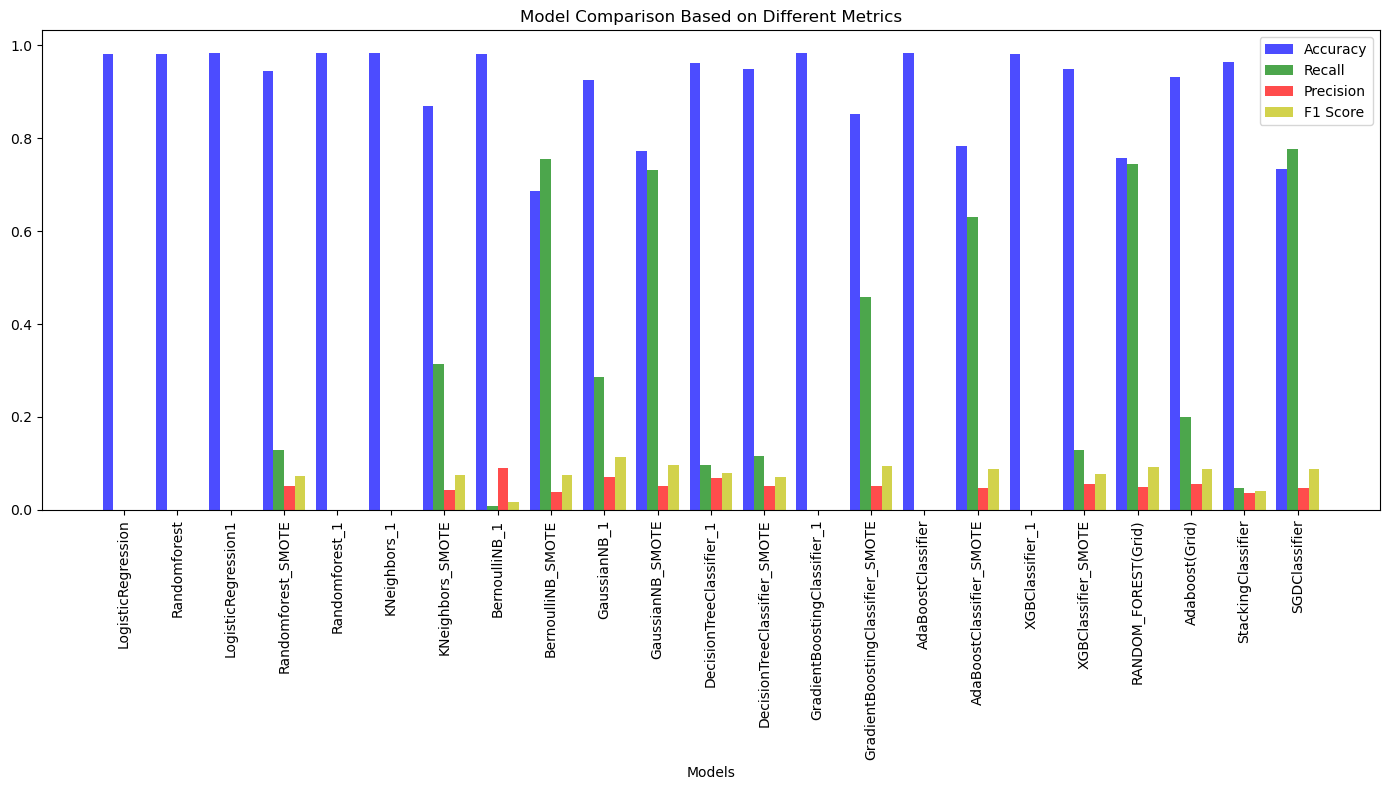

In [256]:
models = [
    "LogisticRegression", "Randomforest", "LogisticRegression1", "Randomforest_SMOTE",
    "Randomforest_1", "KNeighbors_1", "KNeighbors_SMOTE", "BernoulliNB_1",
    "BernoulliNB_SMOTE", "GaussianNB_1", "GaussianNB_SMOTE", "DecisionTreeClassifier_1",
    "DecisionTreeClassifier_SMOTE", "GradientBoostingClassifier_1", "GradientBoostingClassifier_SMOTE",
    "AdaBoostClassifier", "AdaBoostClassifier_SMOTE", "XGBClassifier_1", "XGBClassifier_SMOTE",
    "RANDOM_FOREST(Grid)", "Adaboost(Grid)", "StackingClassifier", "SGDClassifier"
]

accuracy = [
    0.982412, 0.982028, 0.983026, 0.945315, 0.983257, 0.983026, 0.869969, 0.982028, 0.687327,
    0.925653, 0.773502, 0.962903, 0.949770, 0.982796, 0.852304, 0.983410, 0.784332, 0.982258,
    0.948464, 0.758449, 0.931490, 0.963902, 0.733871
]

recall = [
    0.000000, 0.000000, 0.000000, 0.129630, 0.000000, 0.000000, 0.314815, 0.009259, 0.754630,
    0.287037, 0.731481, 0.097222, 0.115741, 0.000000, 0.458333, 0.000000, 0.629630, 0.000000,
    0.129630, 0.745370, 0.199074, 0.046296, 0.777778
]

precision = [
    0.000000, 0.000000, 0.000000, 0.050725, 0.000000, 0.000000, 0.042157, 0.090909, 0.038986,
    0.070776, 0.051820, 0.067961, 0.051230, 0.000000, 0.051969, 0.000000, 0.047486, 0.000000,
    0.054795, 0.049523, 0.056430, 0.036496, 0.046862
]

f1_score = [
    0.000000, 0.000000, 0.000000, 0.072917, 0.000000, 0.000000, 0.074358, 0.016807, 0.074141,
    0.113553, 0.096784, 0.080000, 0.071023, 0.000000, 0.093352, 0.000000, 0.088312, 0.000000,
    0.077029, 0.092876, 0.087935, 0.040816, 0.088398
]

bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(14, 8))
plt.bar(index, accuracy, bar_width, label='Accuracy', color='b', alpha=0.7)
plt.bar(index + bar_width, recall, bar_width, label='Recall', color='g', alpha=0.7)
plt.bar(index + 2 * bar_width, precision, bar_width, label='Precision', color='r', alpha=0.7)
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score', color='y', alpha=0.7)
plt.xlabel('Models')
plt.xticks(index + 1.5 * bar_width, models, rotation=90)
plt.title('Model Comparison Based on Different Metrics')
plt.legend()
plt.tight_layout()
plt.show()


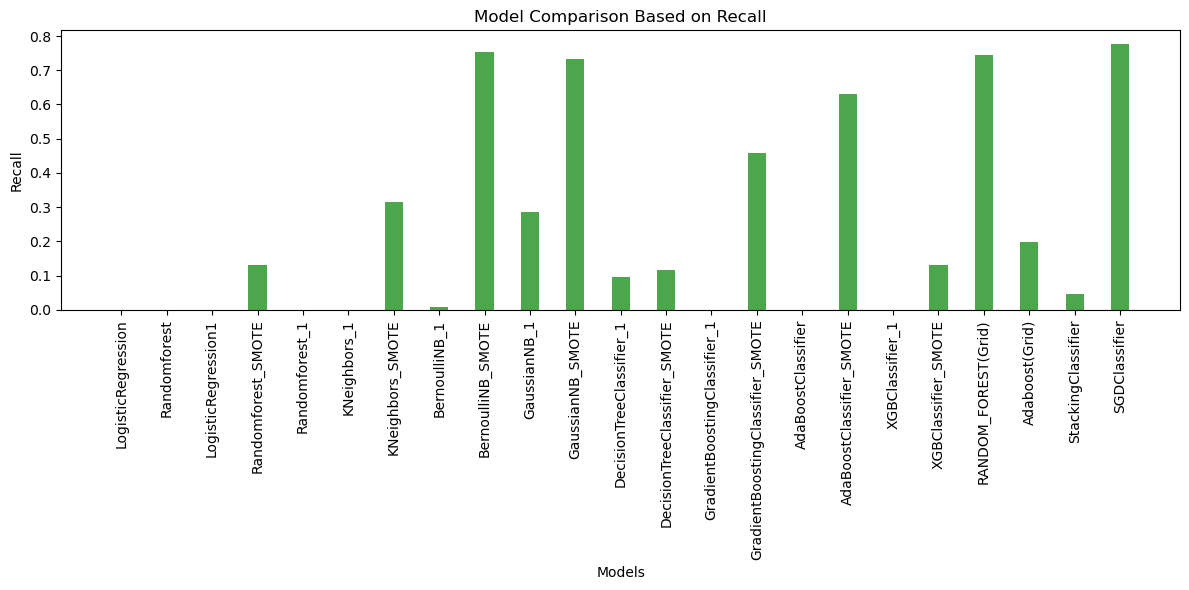

In [259]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    "LogisticRegression", "Randomforest", "LogisticRegression1", "Randomforest_SMOTE",
    "Randomforest_1", "KNeighbors_1", "KNeighbors_SMOTE", "BernoulliNB_1",
    "BernoulliNB_SMOTE", "GaussianNB_1", "GaussianNB_SMOTE", "DecisionTreeClassifier_1",
    "DecisionTreeClassifier_SMOTE", "GradientBoostingClassifier_1", "GradientBoostingClassifier_SMOTE",
    "AdaBoostClassifier", "AdaBoostClassifier_SMOTE", "XGBClassifier_1", "XGBClassifier_SMOTE",
    "RANDOM_FOREST(Grid)", "Adaboost(Grid)", "StackingClassifier", "SGDClassifier"
]

recall = [
    0.000000, 0.000000, 0.000000, 0.129630, 0.000000, 0.000000, 0.314815, 0.009259, 0.754630,
    0.287037, 0.731481, 0.097222, 0.115741, 0.000000, 0.458333, 0.000000, 0.629630, 0.000000,
    0.129630, 0.745370, 0.199074, 0.046296, 0.777778
]

bar_width = 0.4
index = np.arange(len(models))
plt.figure(figsize=(12, 6))
plt.bar(index, recall, bar_width, color='g', alpha=0.7)
plt.xlabel('Models')
plt.xticks(index, models, rotation=90)
plt.ylabel('Recall')
plt.title('Model Comparison Based on Recall')
plt.tight_layout()

plt.show()


#### *`Business Interpertation:`*

   *`Healthcare Providers:`* Hospitals and healthcare institutions can use the predictive model to identify high-risk patients and allocate resources more efficiently for early intervention, potentially reducing treatment costs and improving patient outcomes. 

-   *`Insurance Companies:`*
    Insurance providers can use the model to assess stroke risk accurately, leading to more tailored policies and pricing. 
   *`Academic Value: `*
-	The project contributes to academic research by advancing the understanding of stroke risk factors and prediction models. 
-	It can serve as a benchmark for future studies in the field of predictive healthcare analytics. 
    Social Value: 
-	*`Stroke Prevention:`* The project has the potential to save lives by identifying individuals at risk of stroke and enabling early preventive measures. 
-	Reducing Healthcare Burden: By reducing the incidence of stroke, the project can alleviate the burden on healthcare systems and resources. 
-	*`Health Equity:`* The project can help address health disparities by providing accurate risk assessments for different demographic groups and ensuring fair access to preventive care. 
 
`In summary, the machine learning project for stroke risk prediction has wide-reaching implications. It addresses a critical healthcare issue, offers commercial benefits to the healthcare and insurance sectors, contributes to academic research, and has the potential to improve public health and reduce healthcare costs.`